# Problem statement
Predicting attrition of employees. Uncovering the factors that lead to employee attrition. This is a fictional data set created by IBM data scientists.

# Importing libraries and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 100

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data

In [4]:
df = pd.read_csv('C:\\Users\\imvv44\\Desktop\\PRJCTS FOR GITHUB and Kaggle\\IBM_HR.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [6]:
df.shape

(23436, 37)

In [7]:
## Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

# Checking for duplicates

In [8]:
df.duplicated().any()

True

There are duplicate entries present in the data

In [9]:
## Checking number of duplicates
df.duplicated().sum()

14

We can observe that there are 14 duplicate values

In [10]:
## Checking duplicate entries
duplicate = df[df.duplicated()]
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
10,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
11,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
12,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
666,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,1,123457,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,4.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
667,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Marketing,1,4,123459,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,5.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
668,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,5,123460,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
669,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Marketing,1,6,123461,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,5.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
6109,26.0,Voluntary Resignation,Travel_Rarely,1357.0,Research & Development,25,3.0,Life Sciences,1,813,124268,1.0,Male,48,1.0,1.0,Laboratory Technician,3,Single,2293,21534.0,1.0,Y,No,12,3.0,3.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,Seek
6110,26.0,Voluntary Resignation,Travel_Rarely,1357.0,Research & Development,25,3.0,Technical Degree,1,814,124269,1.0,Male,48,1.0,1.0,Laboratory Technician,3,Single,2293,26009.0,1.0,Y,No,12,3.0,3.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,Seek
6111,26.0,Voluntary Resignation,Travel_Rarely,1357.0,Research & Development,25,3.0,Life Sciences,1,815,124270,1.0,Male,48,1.0,1.0,Laboratory Technician,3,Single,2293,10558.0,1.0,Y,No,12,3.0,3.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,Seek


In [11]:
## Dropping duplicate entries
df.drop_duplicates(keep = 'first', inplace = True)

In [12]:
df.duplicated().any()

False

In [13]:
df.shape

(23422, 37)

After removing duplicates we can observe the change in dimension of dataset

In [14]:
## checking number of unique values in each columns
df.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
DailyRate                     883
Department                      4
DistanceFromHome               59
Education                       6
EducationField                  8
EmployeeCount                   3
EmployeeNumber              23366
Application ID              23419
EnvironmentSatisfaction         6
Gender                          4
HourlyRate                     73
JobInvolvement                  6
JobLevel                        5
JobRole                        11
JobSatisfaction                 5
MaritalStatus                   4
MonthlyIncome                1351
MonthlyRate                  1429
NumCompaniesWorked             12
Over18                          2
OverTime                        3
PercentSalaryHike              17
PerformanceRating               4
RelationshipSatisfaction        4
StandardHours                   3
StockOptionLevel                5
TotalWorkingYe

Application ID and EmployeeNumber columns contain very odd number of unique value which have no use for the analysis purpose

In [15]:
## Dropping application ID, over18 and employee count columns has it has no impact on model
df.drop(['Application ID','EmployeeNumber'],axis = 1, inplace = True)

In [16]:
df.shape

(23422, 35)

# Checking for missing values

In [17]:
## Checking missing values in each columns
df.isnull().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtCompany              13
YearsInCurrentRole          15
YearsSin

In [18]:
## Checking missing value entries
df[df.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
145,41.0,Current employee,Travel_Rarely,933.0,Research & Development,9,4.0,Life Sciences,1,1.0,Male,42,2.0,3.0,Healthcare Representative,1,Married,10673,3142.0,NaN,Y,Yes,13,3.0,3.0,80.0,1.0,21.0,5.0,2.0,10.0,9.0,9.0,5.0,Seek
559,41.0,Current employee,Travel_Rarely,918.0,Sales,6,3.0,Marketing,1,4.0,Male,35,3.0,3.0,Sales Executive,NaN,Single,9241,15869.0,1.0,Y,No,12,3.0,2.0,80.0,0.0,10.0,3.0,3.0,10.0,8.0,8.0,7.0,Adzuna
591,41.0,Current employee,Travel_Rarely,447.0,Research & Development,5,3.0,Life Sciences,1,2.0,Male,85,4.0,2.0,Healthcare Representative,2,NaN,6870,15530.0,3.0,Y,No,12,3.0,1.0,80.0,0.0,11.0,3.0,1.0,3.0,2.0,1.0,2.0,Indeed
656,37.0,Voluntary Resignation,NaN,1373.0,Research & Development,2,2.0,Other,1,4.0,Male,92,2.0,1.0,Laboratory Technician,3,Single,2090,2396.0,6.0,Y,Yes,15,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,Seek
712,37.0,Voluntary Resignation,Travel_Frequently,504.0,Research & Development,10,3.0,Medical,1,3.0,Male,76,3.0,2.0,Manufacturing Director,4,Divorced,7379,17433.0,2.0,Y,No,11,3.0,3.0,80.0,1.0,12.0,NaN,2.0,6.0,3.0,NaN,4.0,Adzuna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23308,57.0,Current employee,Travel_Rarely,593.0,Research & Development,1.0,4.0,Life Sciences,1,4.0,Male,88,3.0,2.0,Healthcare Representative,3,Married,6755,2967.0,0.0,Y,No,11,3.0,3.0,80.0,0.0,NaN,2.0,3.0,3.0,2.0,1.0,2.0,Company Website
23352,57.0,NaN,Travel_Rarely,593.0,Research & Development,1.0,4.0,Life Sciences,1,3.0,Female,78,2.0,1.0,Laboratory Technician,3,Single,2625,25308.0,1.0,Y,No,20,3.0,3.0,80.0,0.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,Indeed
23433,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1,4.0,Male,83,3.0,2.0,Sales Executive,3,Married,5301,2939.0,4.0,Y,No,15,3.0,3.0,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Adzuna
23434,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1,3.0,Female,45,2.0,3.0,Manager,1,Single,11631,5615.0,2.0,Y,No,12,3.0,4.0,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,Indeed


Here we can observe 228 columns contains missing values in total, therefore using iterative imputer to fill those columns

In [19]:
(df.isnull().sum().sum()/len(df))*100

1.4857825975578516

As the number of missing values percent is 1.48% removing all the rows with missing values

In [20]:
df.dropna(inplace = True)

In [21]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

Now we can observe that missing values have been treated

In [22]:
df.shape

(23194, 35)

Rows in the dataset have been reduced to 23194 after removing rows containing missing value

# Checking value counts for columns

In [23]:
## Checking for value counts in each columns
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())



Age
35.0    1218
34.0    1210
36.0    1101
31.0    1079
29.0    1073
32.0     956
30.0     950
38.0     941
33.0     917
40.0     871
37.0     791
27.0     772
28.0     752
42.0     734
39.0     659
45.0     645
41.0     642
26.0     598
44.0     526
46.0     518
43.0     511
50.0     477
24.0     416
25.0     411
47.0     383
49.0     382
55.0     328
53.0     308
51.0     301
48.0     301
52.0     287
54.0     285
22.0     257
23.0     223
58.0     223
56.0     220
21.0     208
20.0     174
59.0     148
19.0     130
18.0     127
60.0      80
57.0      61
Name: Age, dtype: int64

Attrition
Current employee         19531
Voluntary Resignation     3663
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        16446
Travel_Frequently     4376
Non-Travel            2372
Name: BusinessTravel, dtype: int64

DailyRate
691.0     99
1329.0    80
408.0     80
329.0     79
530.0     78
          ..
776.0     14
1387.0    14
573.0     14
1015.0    14
363.0     14
Name: DailyRate, Length

In [24]:
print(df[df.EducationField == 'Test'])
print(df[df.EnvironmentSatisfaction == 129588.0])
print(df[df.Gender == '2'])
print(df[df.HourlyRate == 'Female'])
print(df[df.PercentSalaryHike == 'Yes'])
print(df[df.PerformanceRating == 13.0])
print(df[df.JobInvolvement == 54.0])
print(df[df.JobRole == '4'])
print(df[df.JobSatisfaction == 'Manager'])
print(df[df.MaritalStatus == '4'])
print(df[df.MonthlyIncome == 'Single'])
print(df[df.NumCompaniesWorked == 23258.0])
print(df[df.StockOptionLevel == 80.0])
print(df[df.TrainingTimesLastYear == 30.0])
print(df[df['Employee Source'] == '2'])
print(df[df['Employee Source'] == 'Test'])
print(df[df.EducationField == 'Test'])
print(df[df.OverTime == 'Y'])

        Age         Attrition BusinessTravel  DailyRate  \
21813  49.0  Current employee  Travel_Rarely     1495.0   

                   Department DistanceFromHome  Education EducationField  \
21813  Research & Development              5.0        4.0           Test   

      EmployeeCount  EnvironmentSatisfaction Gender HourlyRate  \
21813             1                      1.0   Male         96   

       JobInvolvement  JobLevel                    JobRole JobSatisfaction  \
21813             3.0       2.0  Healthcare Representative               3   

      MaritalStatus MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
21813       Married          6651      21534.0                 0.0      Y   

      OverTime PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
21813       No                14                3.0                       2.0   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
21813           80.0               1.0               20.0  

In [25]:
df.drop([7260,17027,21813], axis = 0, inplace = True)

Dropping columns which had no impact

In [26]:
df.drop(['StandardHours','EmployeeCount', 'Over18'],axis = 1, inplace = True)

In [27]:
df.shape

(23191, 32)

After removing unwanted rows and columns the dimension has changed to 23191 rows with 32 attributes

In [28]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              

The data types of DistanceFromHome, HourlyRate, MonthlyIncome, PercentSalaryHike are shown as objects. So, converting those data types to numericals. JobSatisfaction column contains numbers and shown as object so converting that column to float

In [29]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,No,20,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23429,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,3.0,No,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23430,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,No,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,No,20,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website


In [30]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype('float64')
df['MonthlyIncome'] = df['MonthlyIncome'].astype('float64')
df['HourlyRate'] = df['HourlyRate'].astype('float64')
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype('float64')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('float64')

In [31]:
df.to_csv('hr_clean.csv')

In [32]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Divorced,10883.0,20467.0,0.0,No,20.0,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23429,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Divorced,10883.0,20467.0,3.0,No,20.0,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23430,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Divorced,10883.0,20467.0,0.0,No,20.0,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Single,10883.0,20467.0,3.0,No,20.0,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website


# Describing Summary statistics

In [33]:
num_cols = df.select_dtypes(include=np.number)
print('numerical columns: ',num_cols.columns, '\n')
cat_cols = df.select_dtypes(include=np.object)
print('categorical_columns: ',cat_cols.columns)

numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 

categorical_columns:  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Employee Source'],
      dtype='object')


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,23191.0,36.923505,9.115810,18.0,30.0,36.0,43.0,60.0
DailyRate,23191.0,802.227286,403.174675,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,23191.0,9.189298,8.099140,1.0,2.0,7.0,14.0,29.0
Education,23191.0,2.908671,1.024886,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,23191.0,2.719978,1.094845,1.0,2.0,3.0,4.0,4.0
HourlyRate,23191.0,65.854556,20.336654,30.0,48.0,66.0,83.0,100.0
JobInvolvement,23191.0,2.730456,0.710121,1.0,2.0,3.0,3.0,4.0
JobLevel,23191.0,2.065370,1.105923,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,23191.0,2.727653,1.101449,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,23191.0,6508.265750,4706.342582,1009.0,2911.0,4936.0,8380.0,19999.0


In [35]:
f.describe(include = object).transpose()

,count,unique,top,freq
Attrition,23191,2,Current employee,19529
BusinessTravel,23191,3,Travel_Rarely,16445
Department,23191,3,Research & Development,15124
EducationField,23191,6,Life Sciences,9573
Gender,23191,2,Male,13908
JobRole,23191,9,Sales Executive,5059
MaritalStatus,23191,3,Married,10611
OverTime,23191,2,No,16627
Employee Source,23191,9,Company Website,5355


# Checking for Outliers

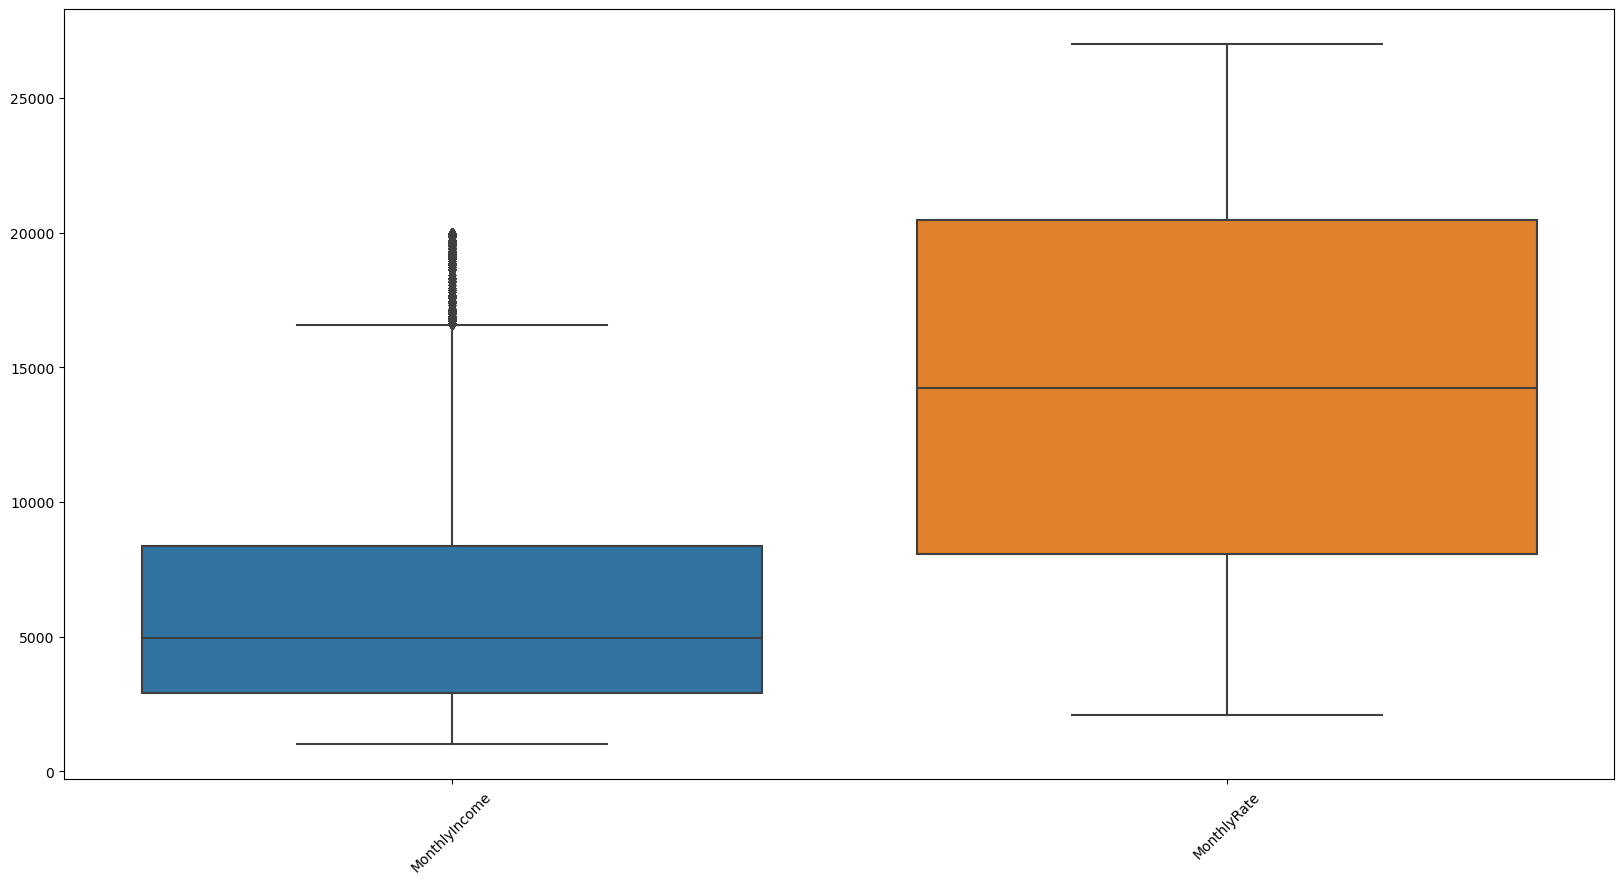

In [36]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df[['MonthlyIncome','MonthlyRate']])
plt.xticks(rotation = 45)
plt.show()

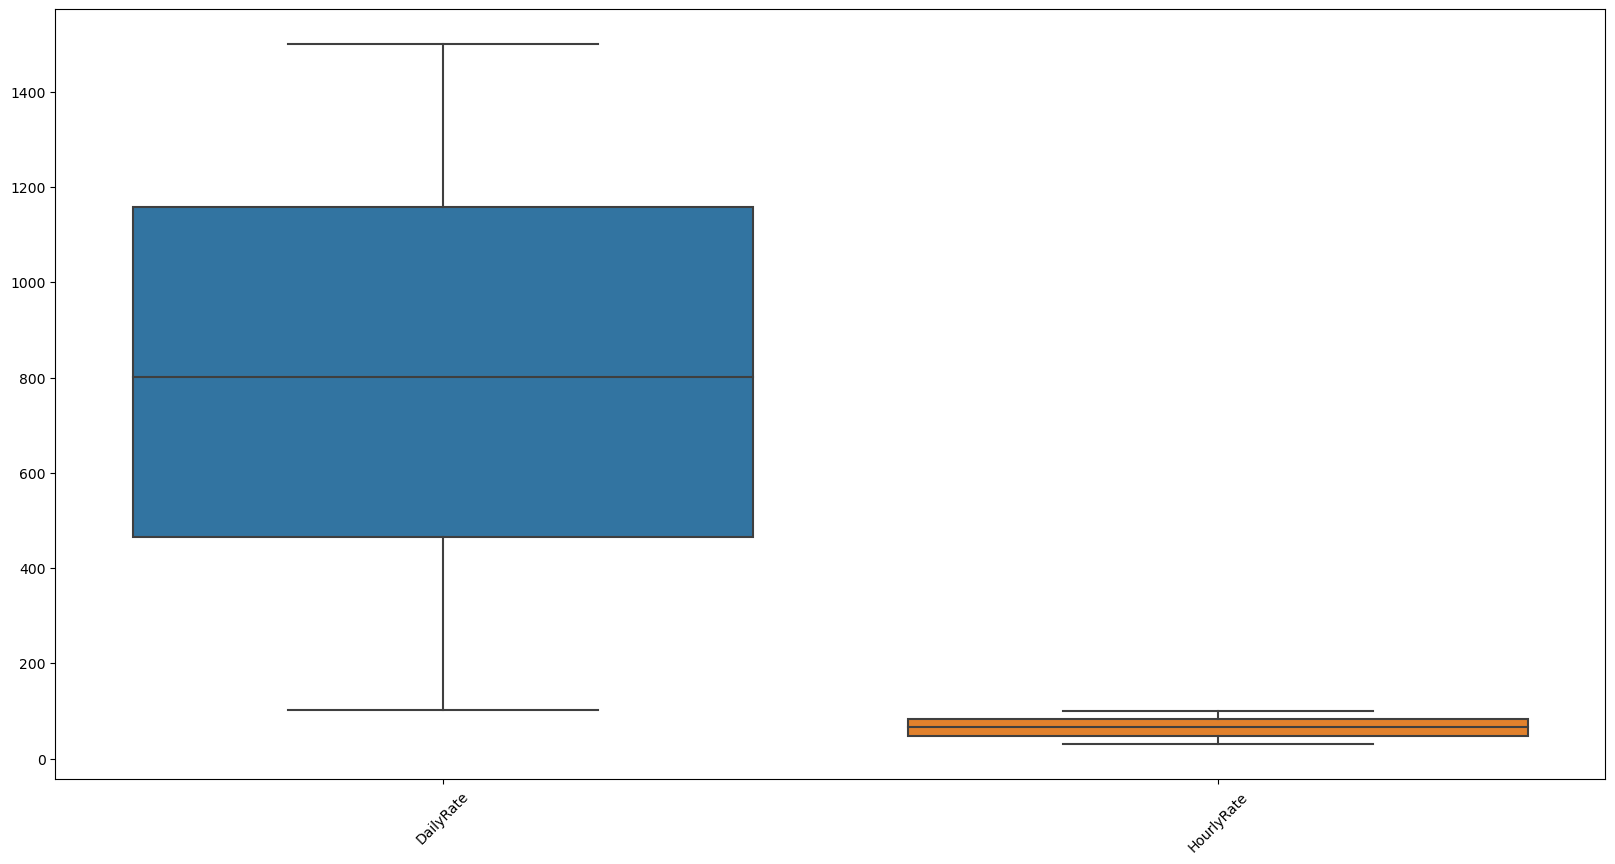

In [37]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df[['DailyRate','HourlyRate']])
plt.xticks(rotation = 45)
plt.show()

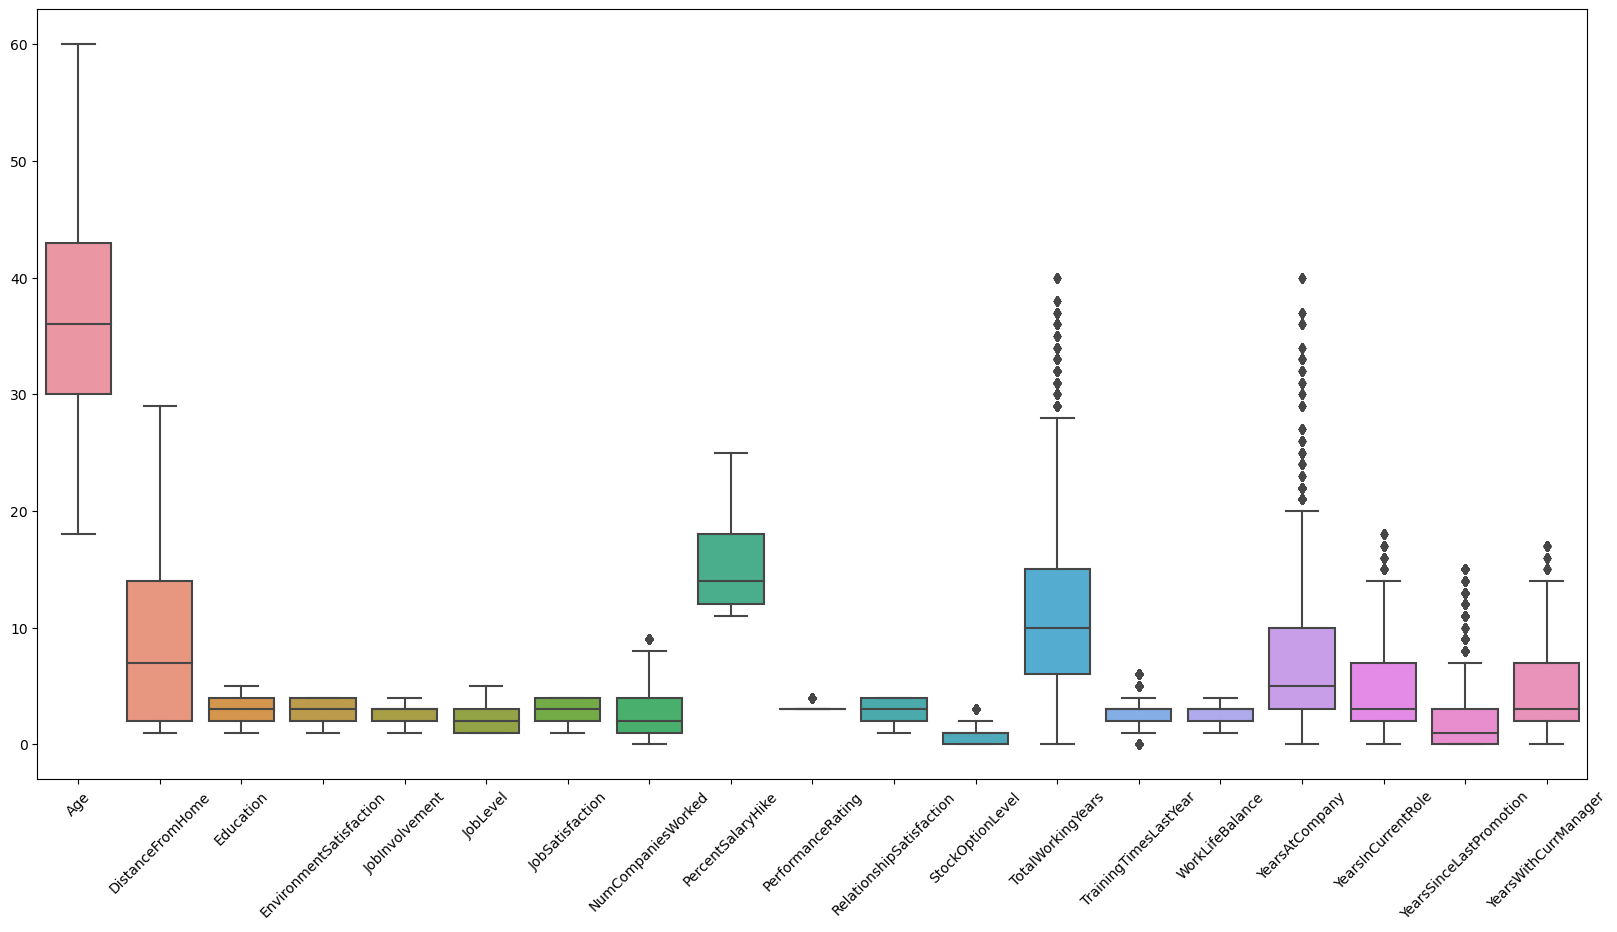

In [38]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df[['Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']])
plt.xticks(rotation = 45)
plt.show()

Monthly income seem to have some outliers but let's ignore it for primary analysis

# Checking distribution of variables

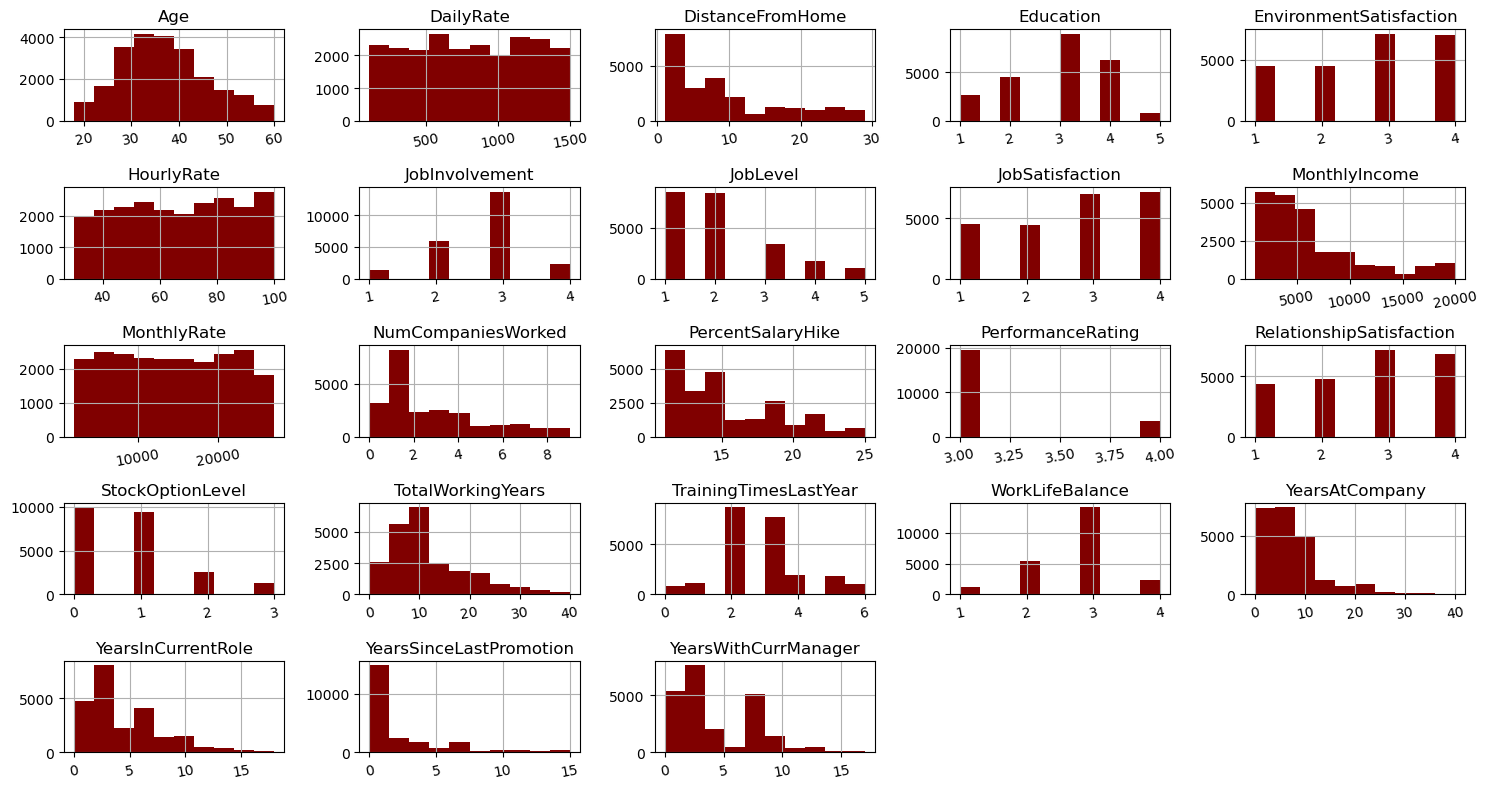

In [39]:
plt.rcParams['figure.figsize'] = [15,8]
num_cols.hist(xrot = 10, color = "maroon")
plt.tight_layout()
plt.show()  

Continous data monthly income which varies with huge values looks right skewed from the observation

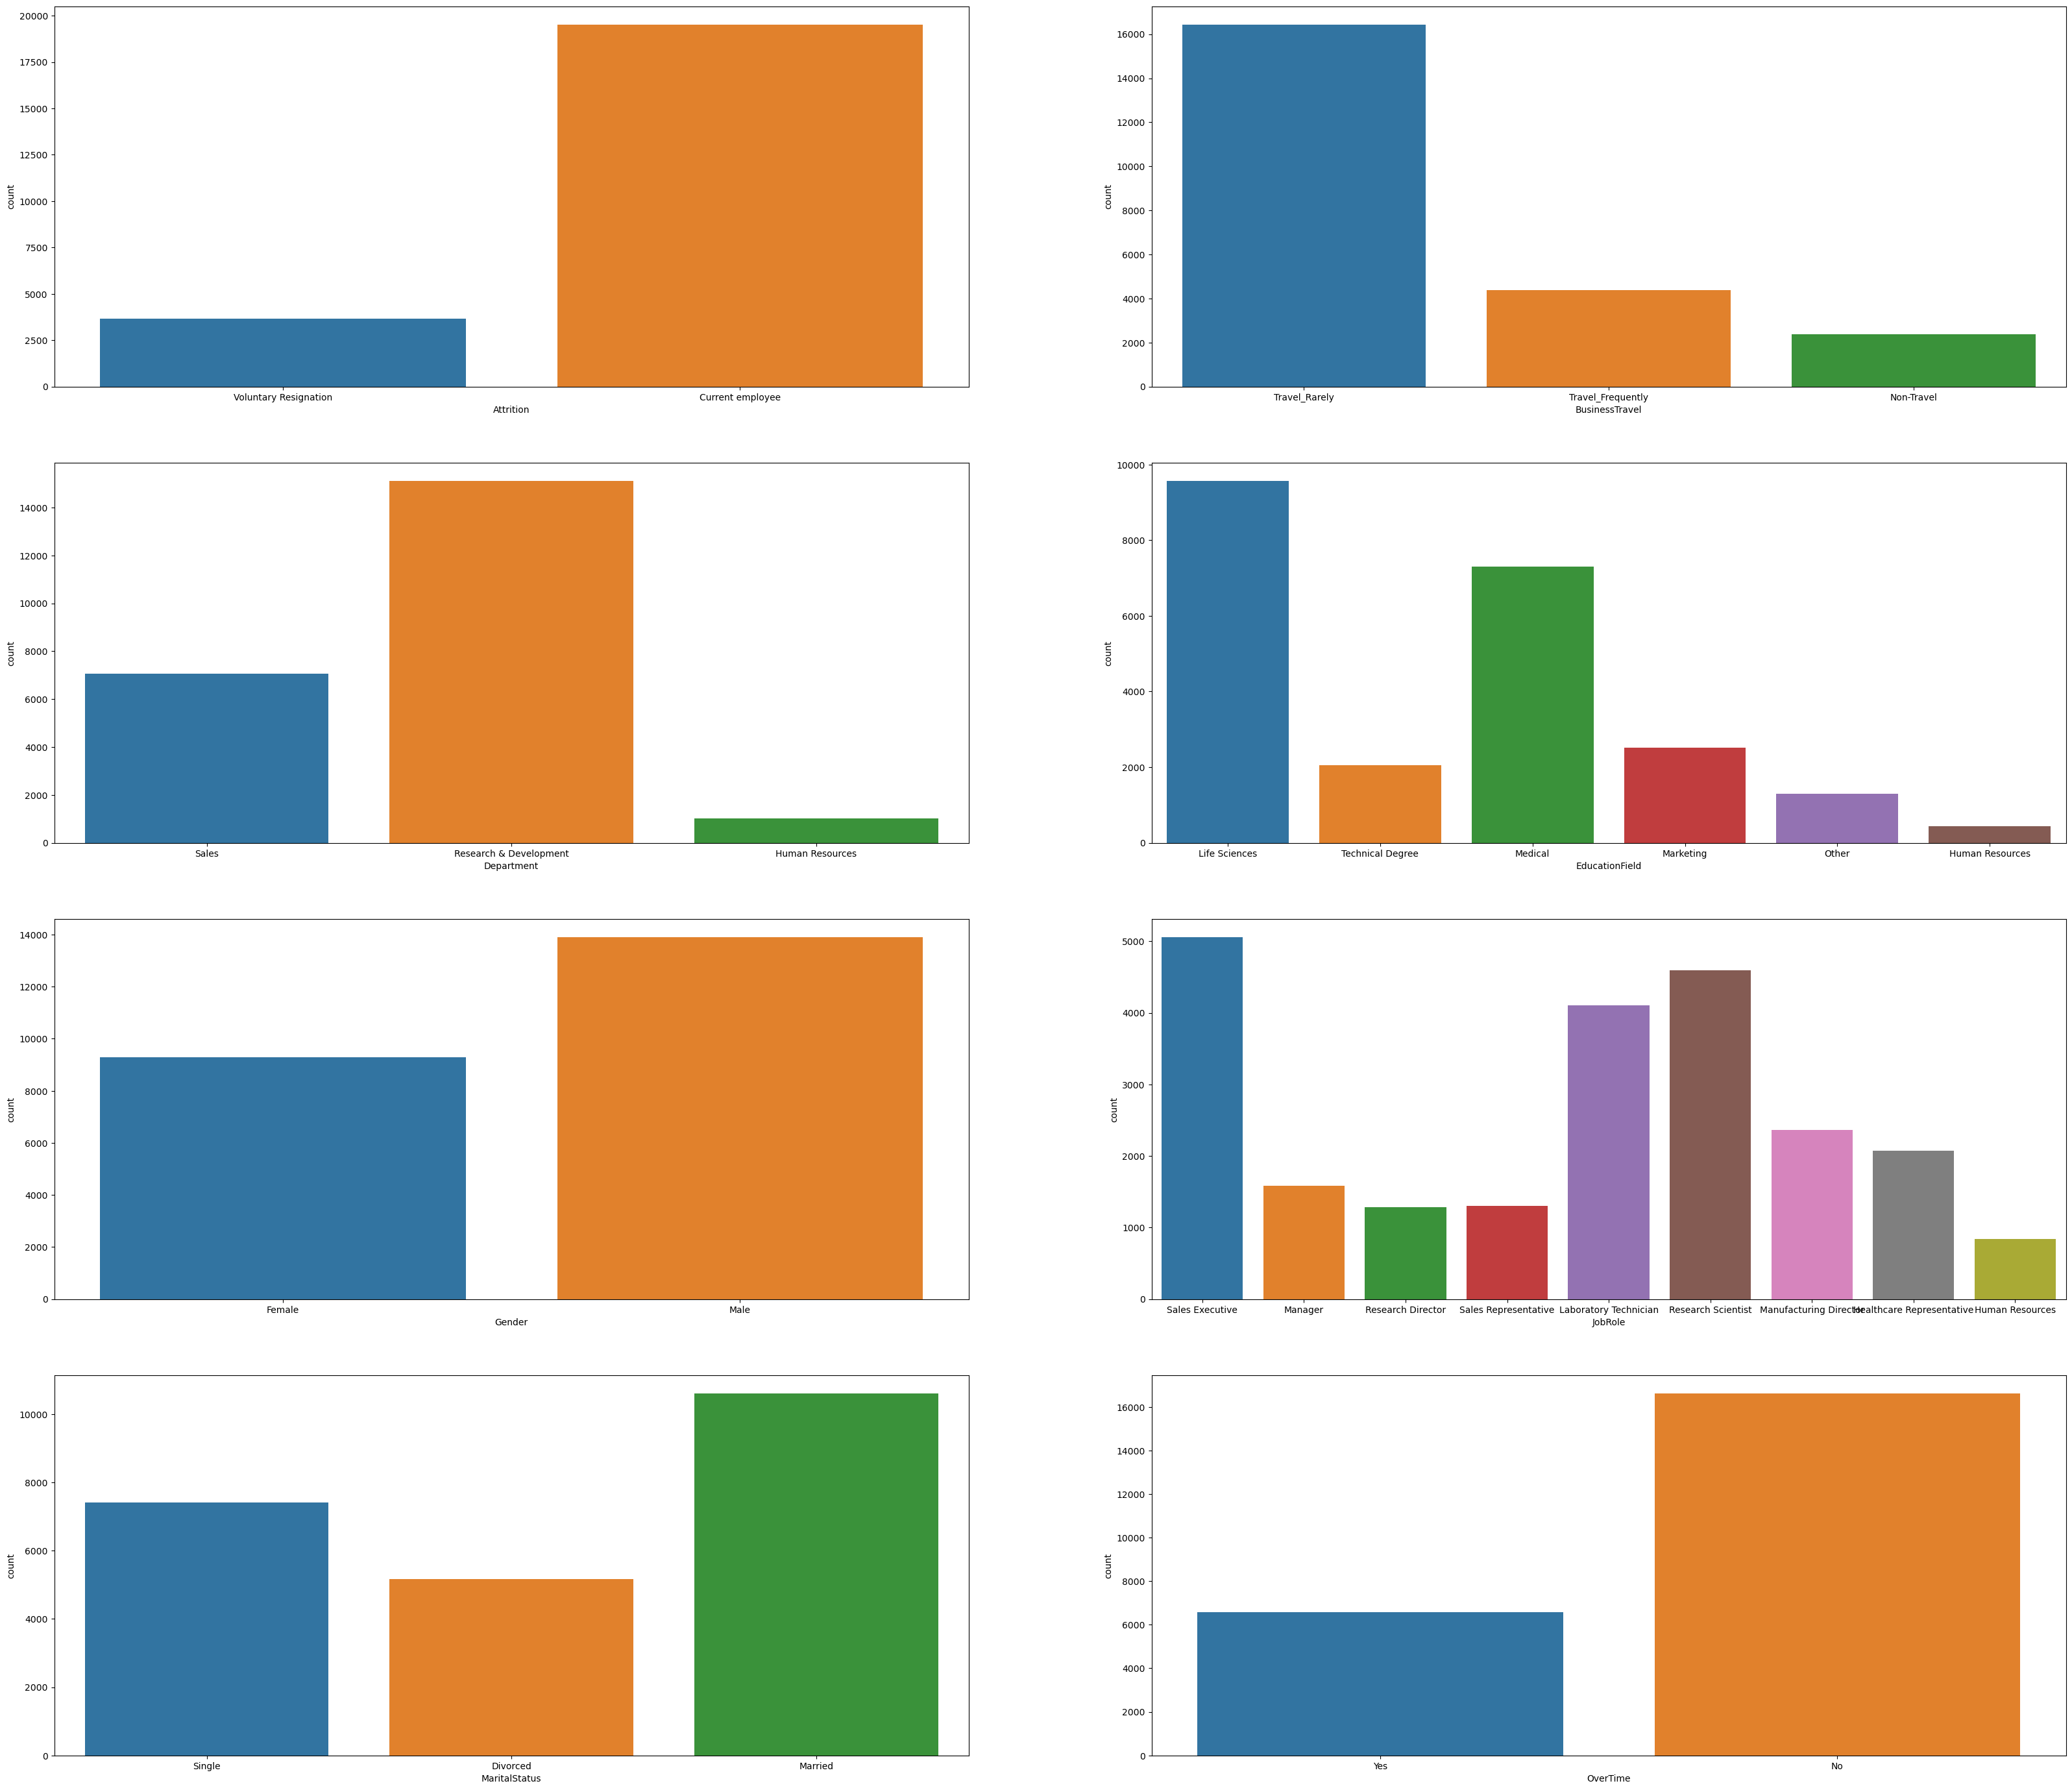

In [40]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (40,35))
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(x=cat_cols[variable], ax = subplot)
plt.show()

The target column attrition looks highly imbalanced but for primary analysis keeping it same as it is

In [41]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

# EDA using visualiaztion

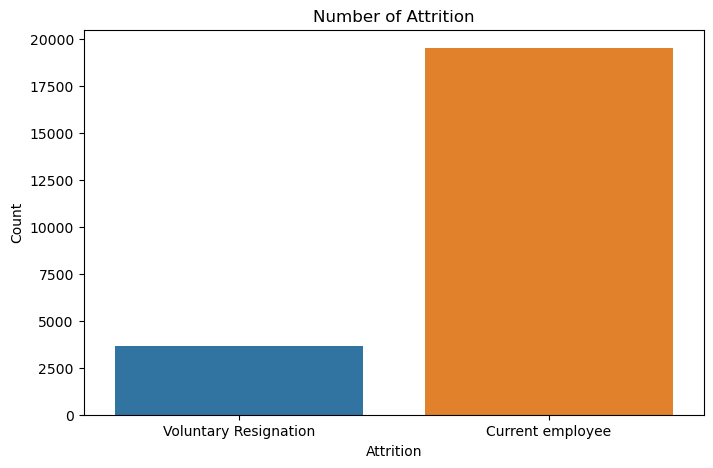

In [42]:
## Attrition ratio
plt.figure(figsize = (8,5))
sns.countplot(df['Attrition'])
plt.title("Number of Attrition")
plt.xlabel("Attrition")
plt.ylabel('Count')
plt.show()

From the given detail in the target column we can observe that around 3500 odd employees have resigned voluntarily at the ratio 1:5 with current employees

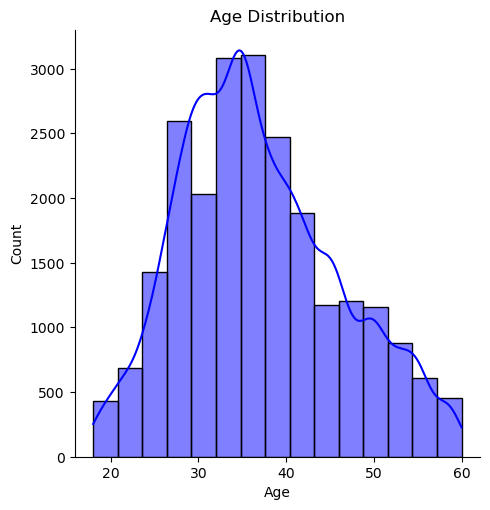

In [43]:
sns.displot(df['Age'], kde = True, color = 'blue', bins = 15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel('Count')
plt.show()

Approximately 60% of the employees are aged between 26 to 45 years

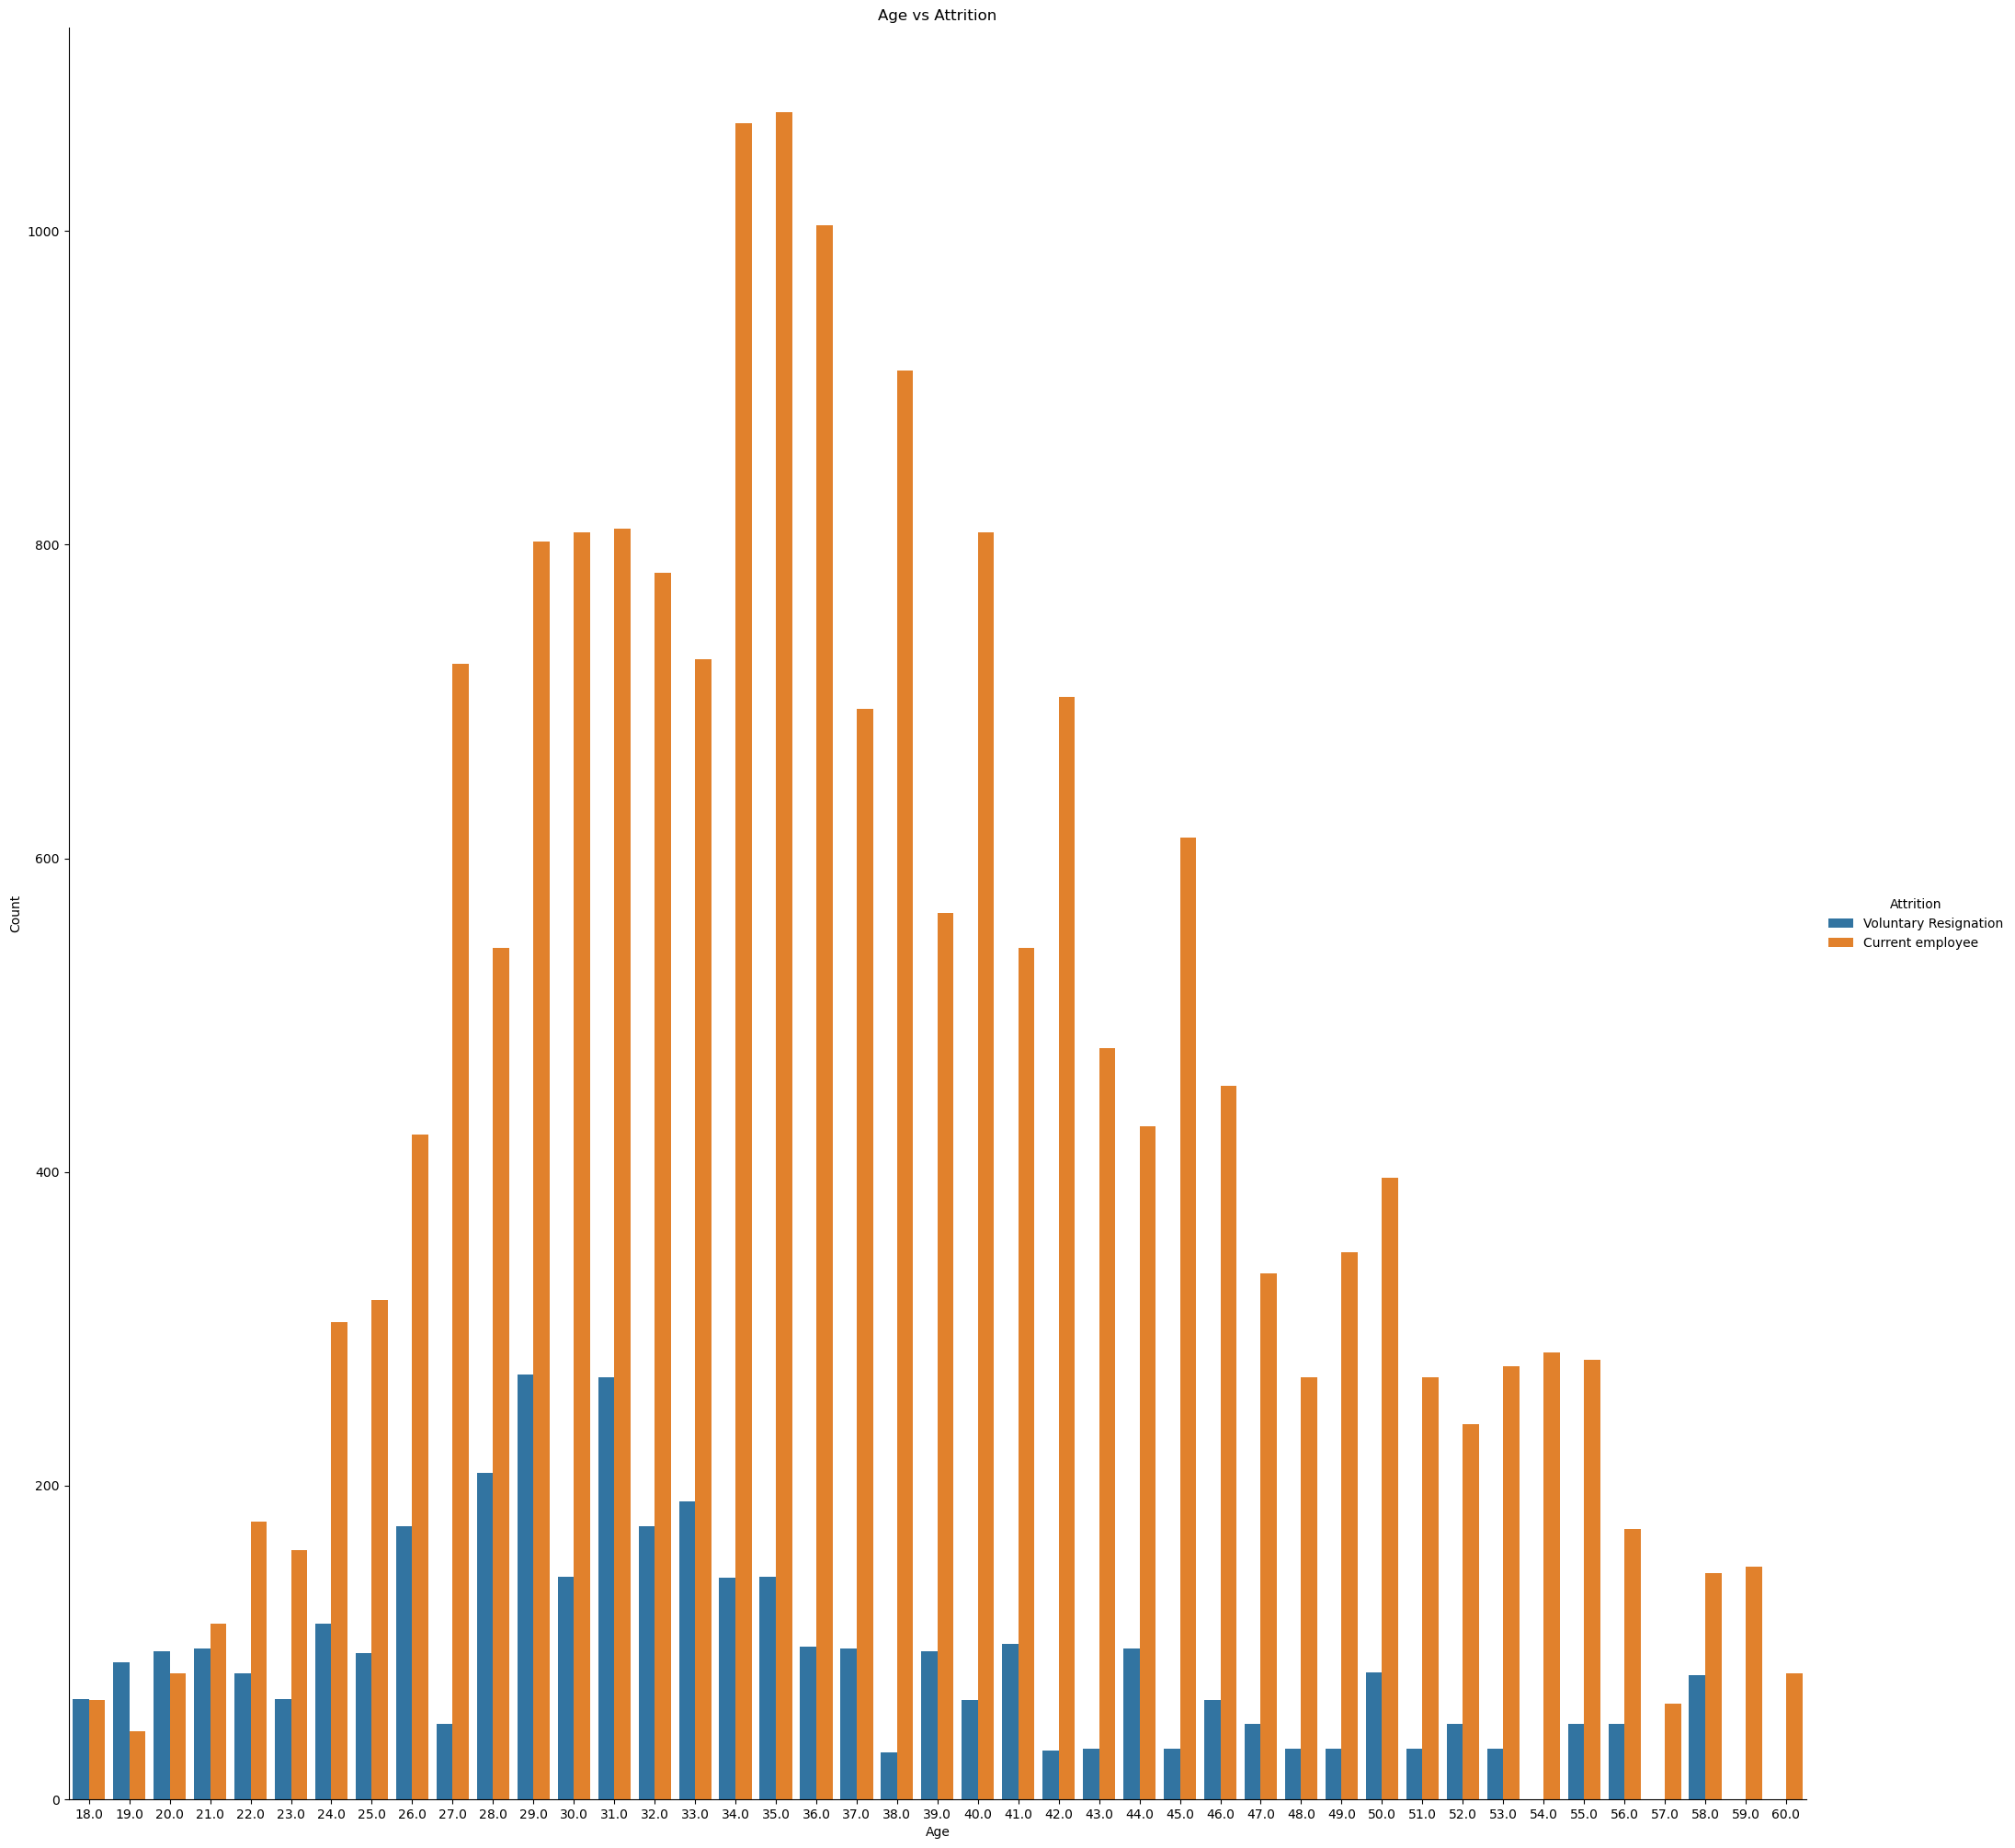

In [46]:
## Attrition VS Age
sns.catplot(x='Age',hue='Attrition',data=df,kind='count',height = 20)
plt.title("Age vs Attrition")
plt.xlabel("Age")
plt.ylabel('Count')
plt.show()

Employees in age group between 18-25 have more instance of resigning

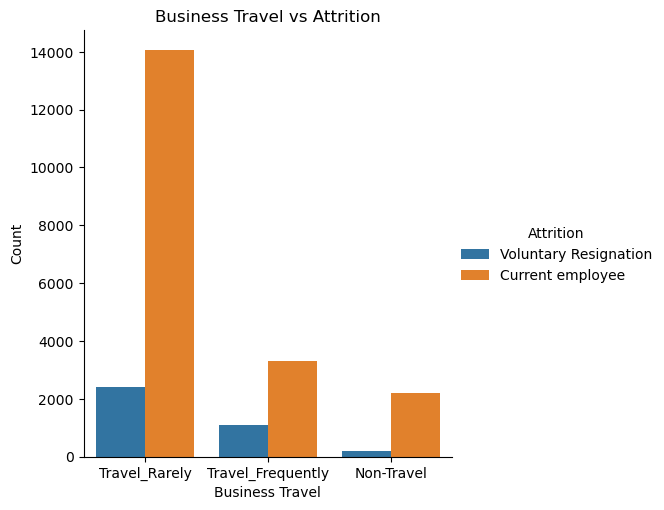

In [48]:
## Business Travel vs Attrition
sns.catplot(x='BusinessTravel',hue='Attrition',data=df,kind='count')
plt.title("Business Travel vs Attrition")
plt.xlabel("Business Travel")
plt.ylabel('Count')
plt.show()

Employees who travel frequently have more instance of resigning

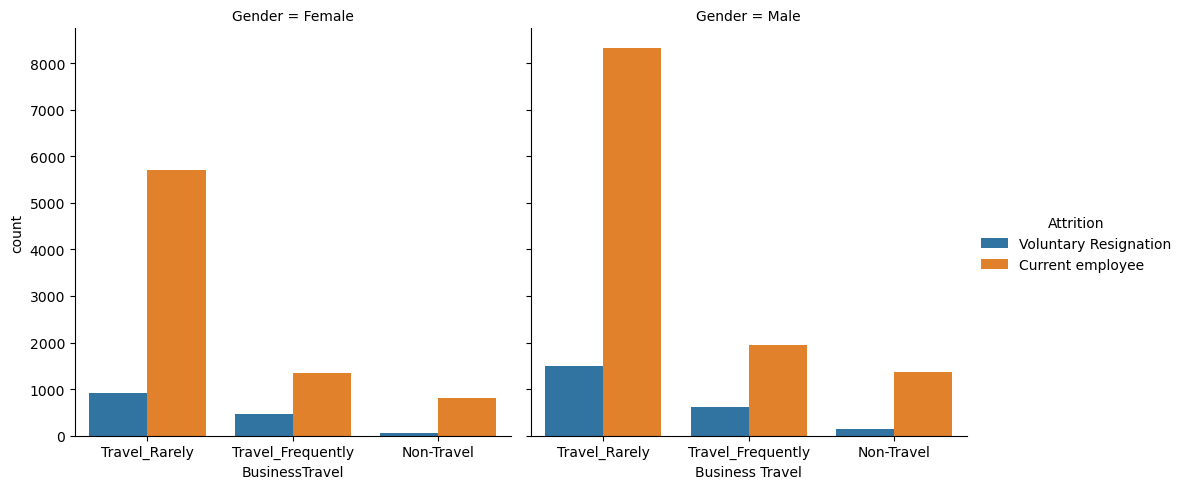

In [49]:
## Business Travel vs Attrition by gender
sns.catplot(x='BusinessTravel',hue='Attrition', col = 'Gender',data=df,kind='count')
plt.xlabel("Business Travel")
plt.ylabel('Count')
plt.show()

The number of resignation is more in both male and female employees who travel frequently

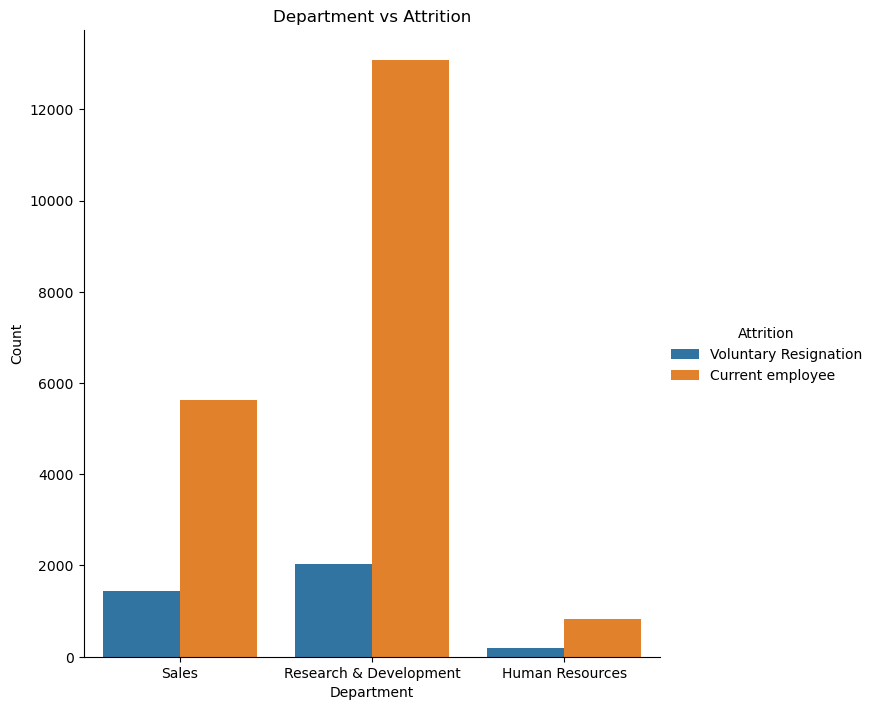

In [50]:
## Department vs Attrition
sns.catplot(x='Department',hue='Attrition',data=df,kind='count', height = 7)
plt.title("Department vs Attrition")
plt.xlabel("Department")
plt.ylabel('Count')
plt.show()

The number of resignation is more in both male and female employees who travel frequently

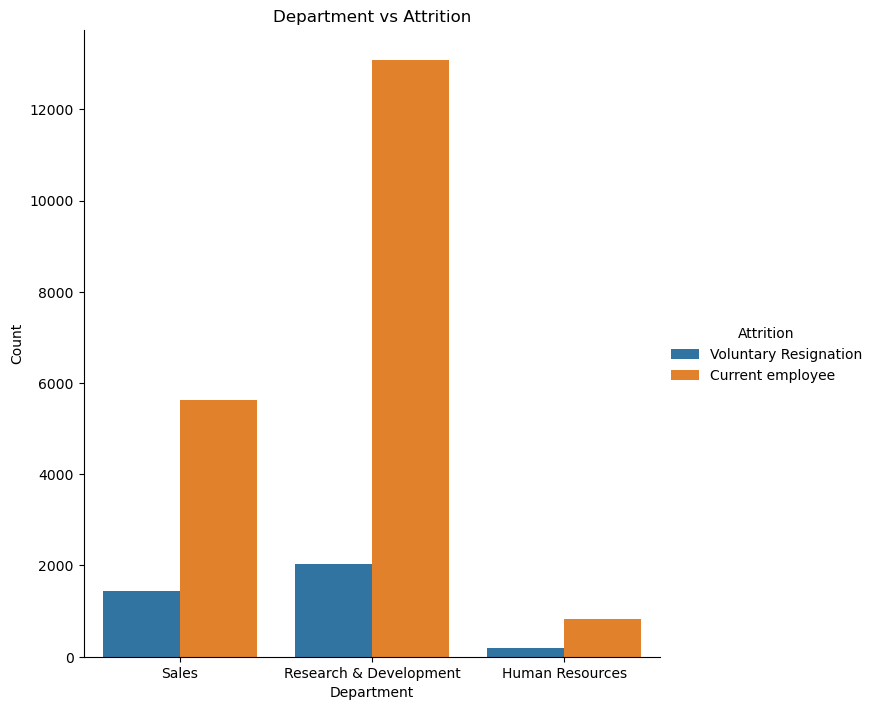

In [51]:
## Department vs Attrition
sns.catplot(x='Department',hue='Attrition',data=df,kind='count', height = 7)
plt.title("Department vs Attrition")
plt.xlabel("Department")
plt.ylabel('Count')
plt.show()

Maximum number of emoloyees belong to R&D department and but the maximum rate of attrition is seen in sales and human resource department.

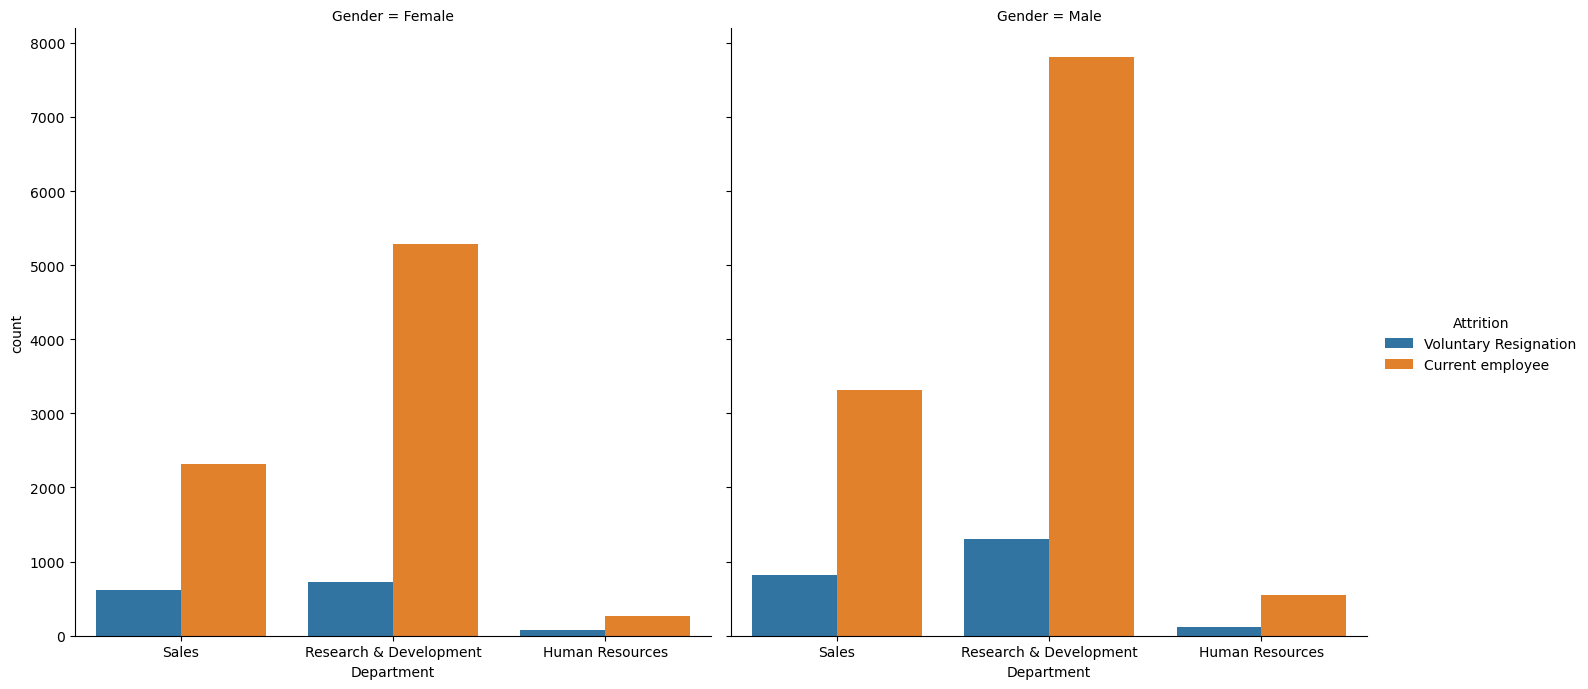

In [52]:
## Deparment vs Attrition by Gender
sns.catplot(x='Department',hue='Attrition',data=df,col = 'Gender', kind='count', height = 7)
plt.xlabel("Department")
plt.ylabel('Count')
plt.show()

Attirion of female employees are more in both sales and HR department whereas for male employees attirition is seen more in Sales rather than HR department

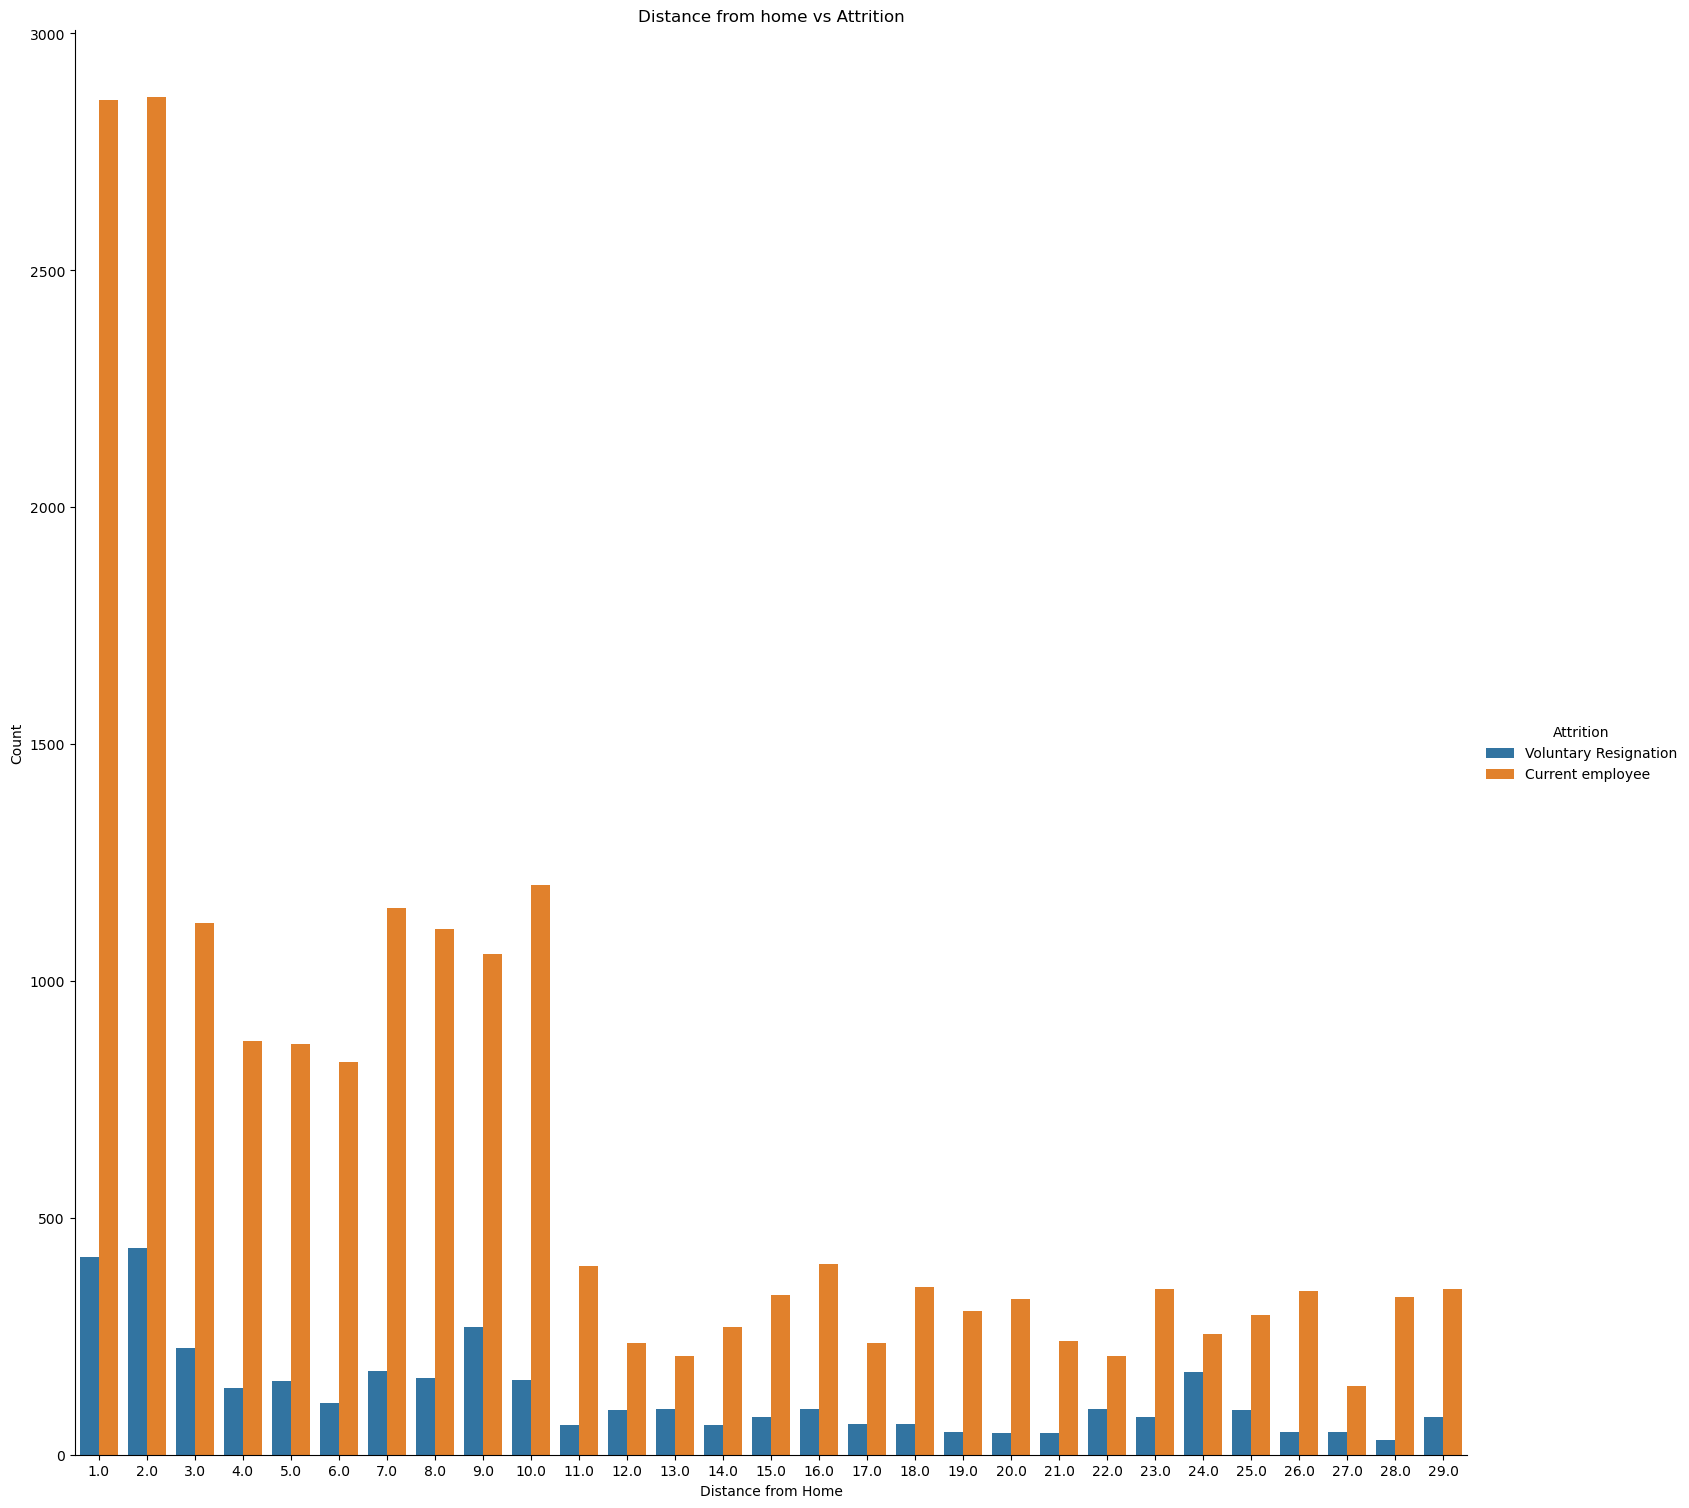

In [53]:
## Distance from home vs Attrition
sns.catplot(x='DistanceFromHome',hue='Attrition',data=df,kind='count',height=15)
plt.title("Distance from home vs Attrition")
plt.xlabel("Distance from Home")
plt.ylabel('Count')
plt.show()

The rate of attrition is higher as the distance exceeds more than 10

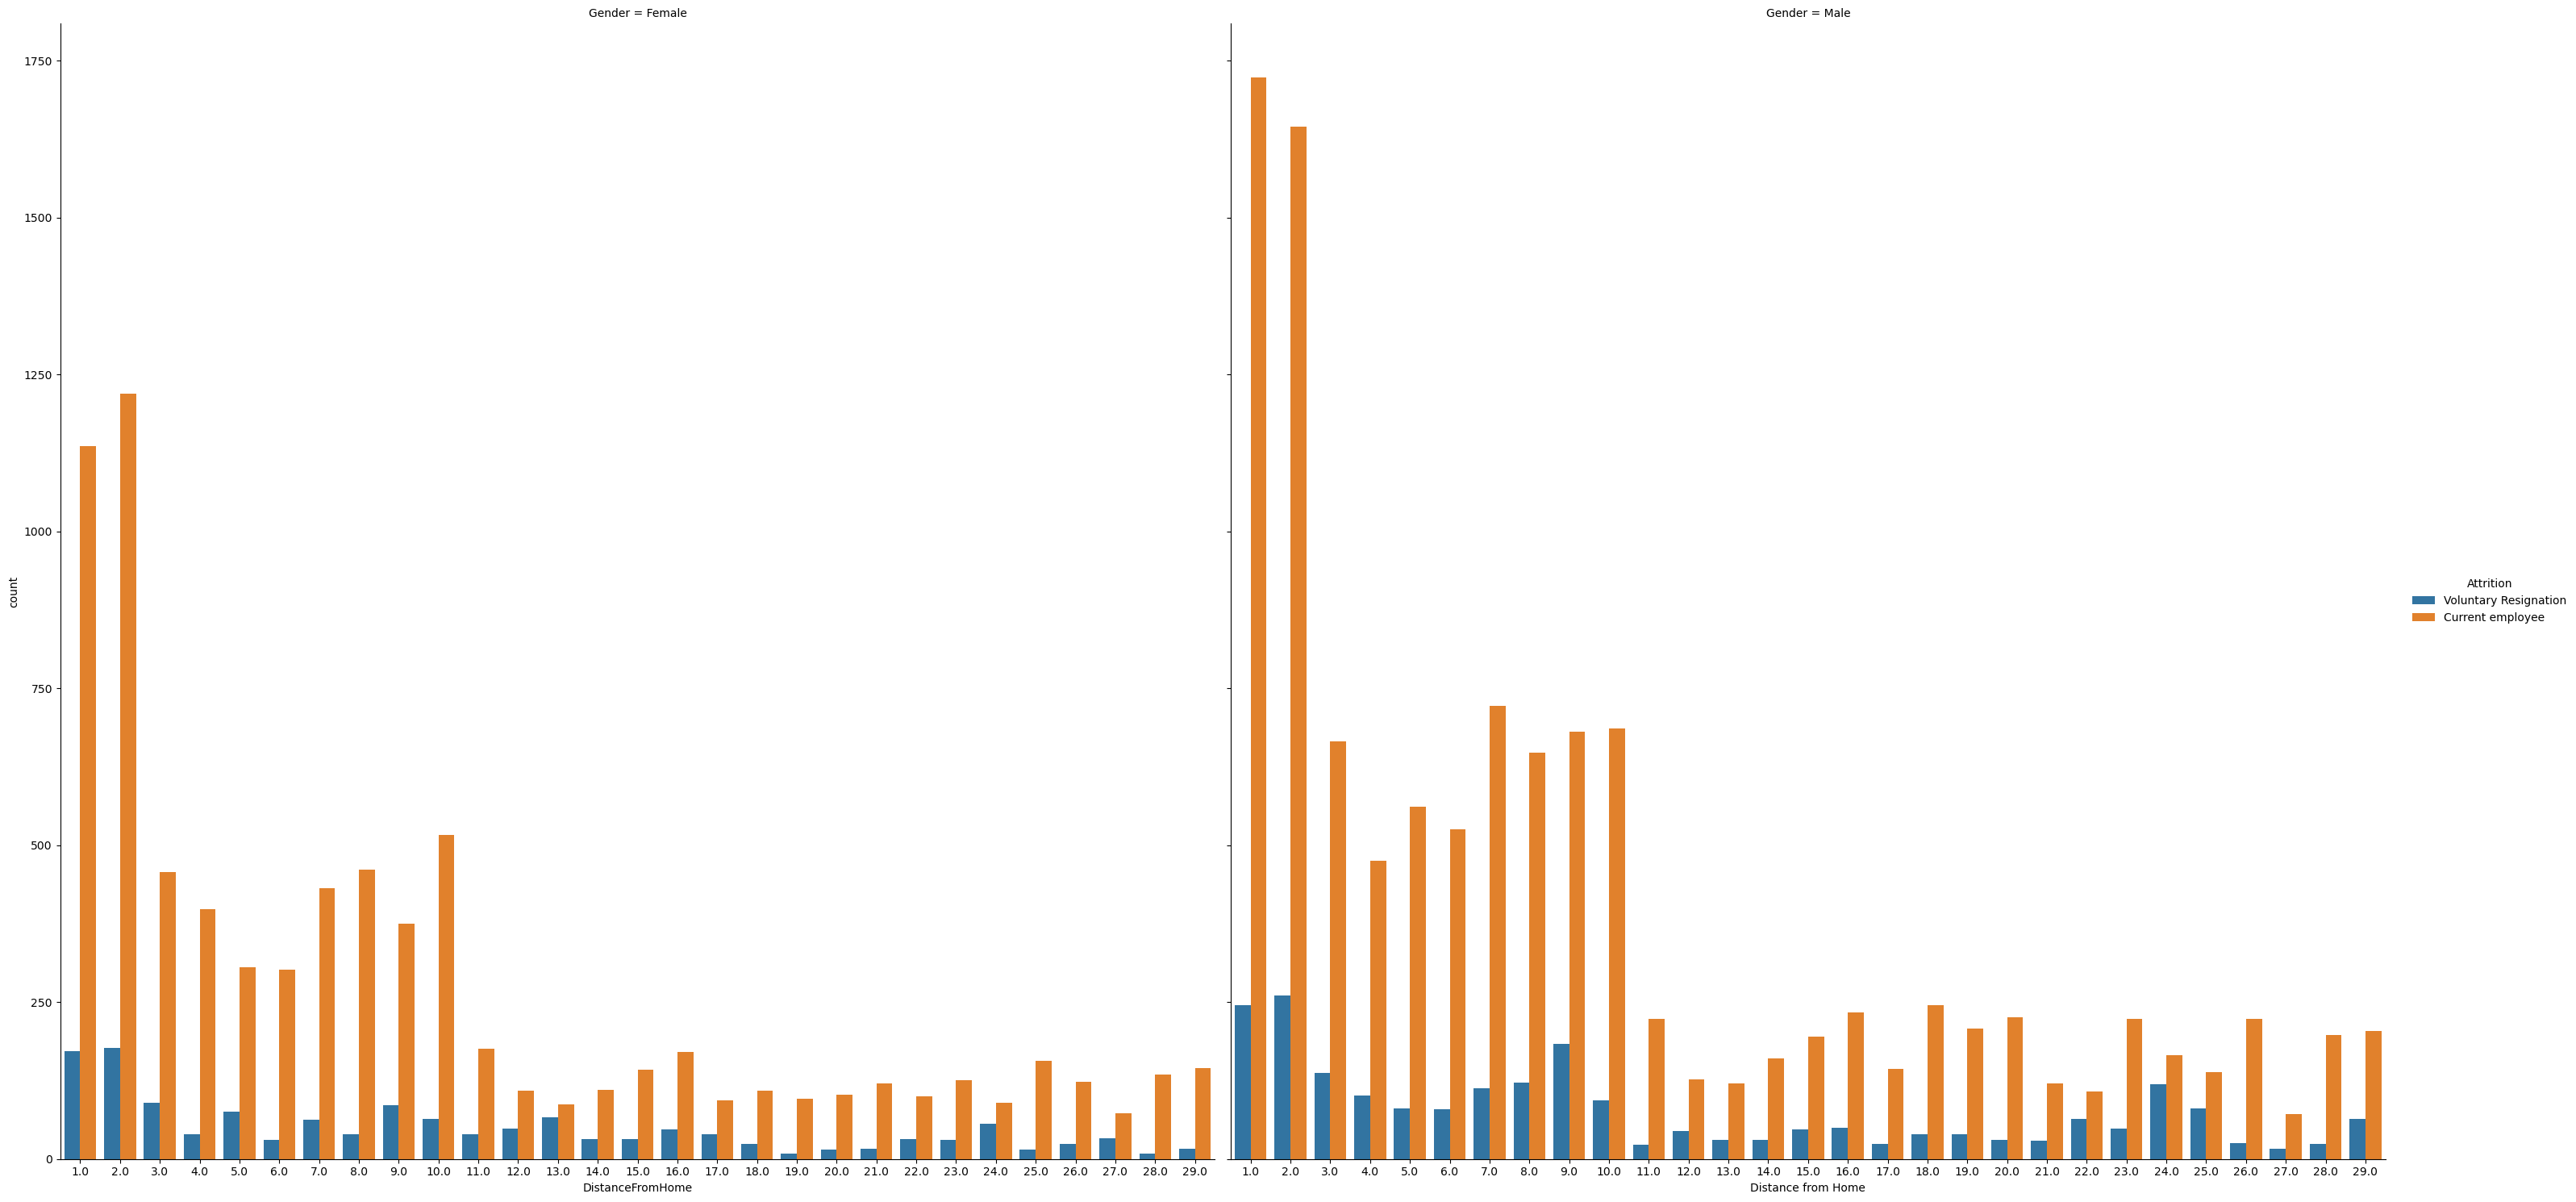

In [54]:
## Distance from home vs Attrition by Gender
sns.catplot(x='DistanceFromHome',hue='Attrition',col = 'Gender',data=df,kind='count',height=15)
plt.xlabel("Distance from Home")
plt.ylabel('Count')
plt.show()

We can observe same impact in both the genders as above

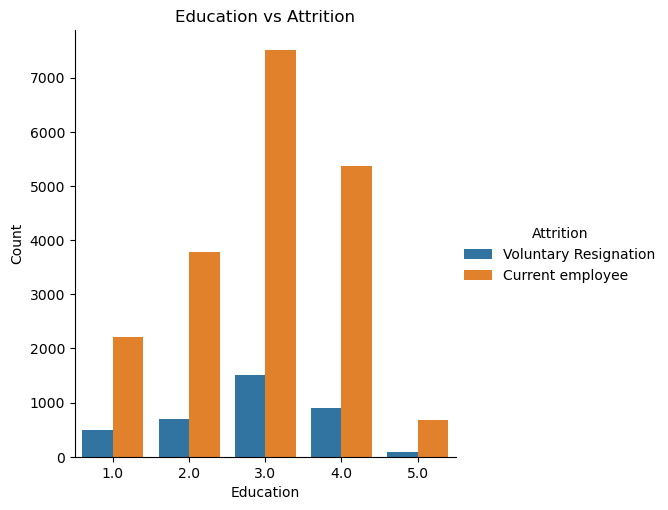

In [55]:
## Education vs Attrition
sns.catplot(x='Education',hue='Attrition',data=df,kind='count')
plt.title("Education vs Attrition")
plt.xlabel("Education")
plt.ylabel('Count')
plt.show()

Employees with education level below college and Doctorate have more chance of leaving

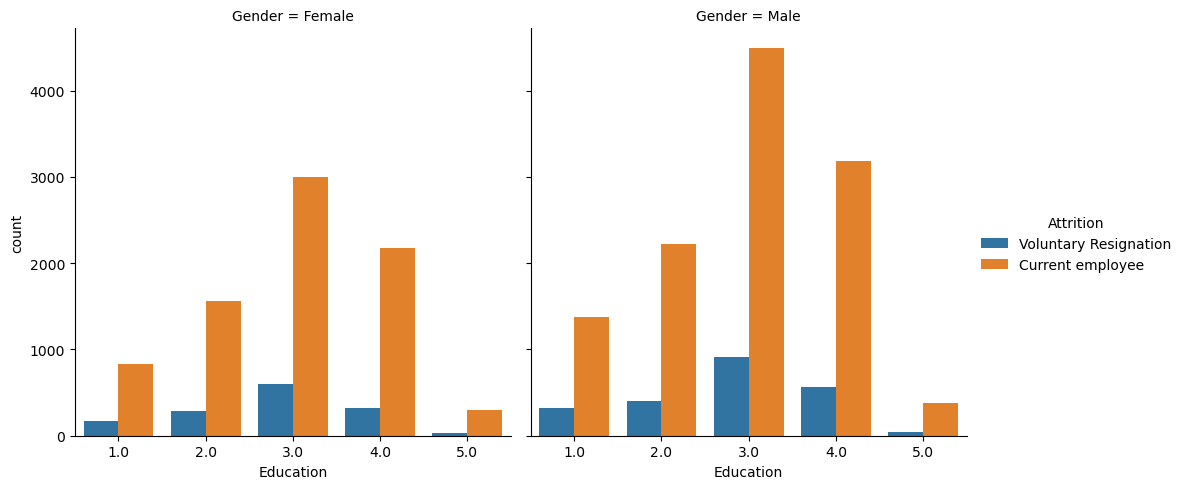

In [56]:
## Education vs Attrition by Gender
sns.catplot(x='Education',hue='Attrition',col = 'Gender', data=df,kind='count')
plt.xlabel("Education")
plt.ylabel('Count')
plt.show()

Attrition in female employees who have education below college is more compared to male employees

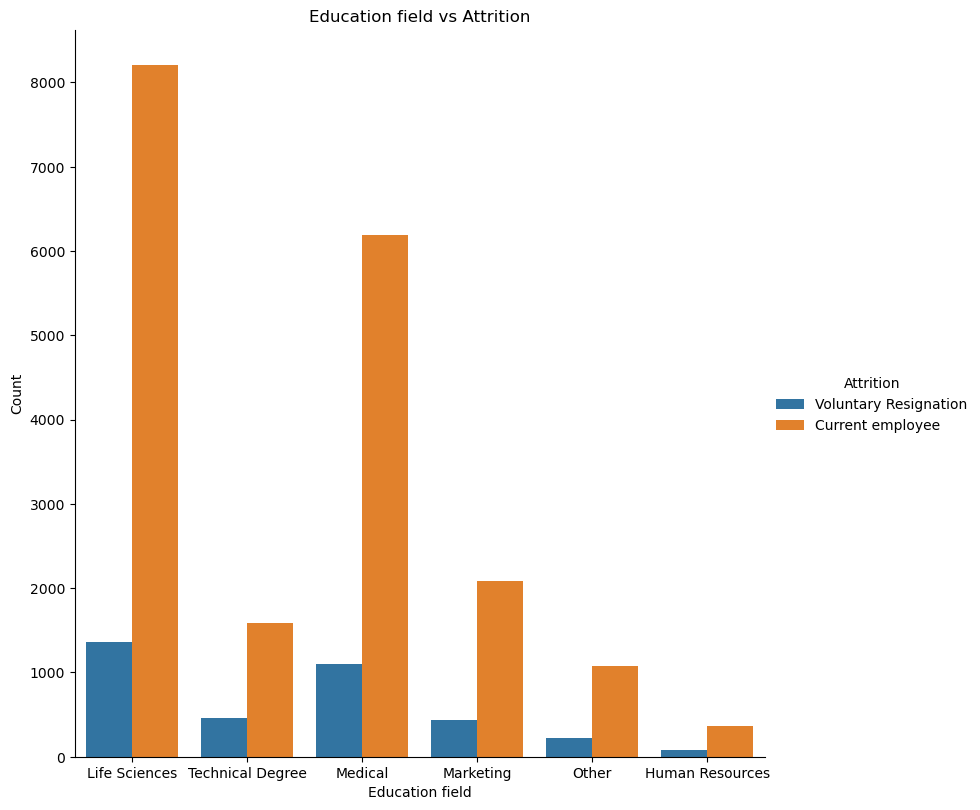

In [57]:
## Education Field vs Attrition
sns.catplot(x='EducationField',hue='Attrition',data=df,kind='count', height = 8)
plt.title("Education field vs Attrition")
plt.xlabel("Education field")
plt.ylabel('Count')
plt.show()

Employees from life science and medical fields have less instances of leaving the company

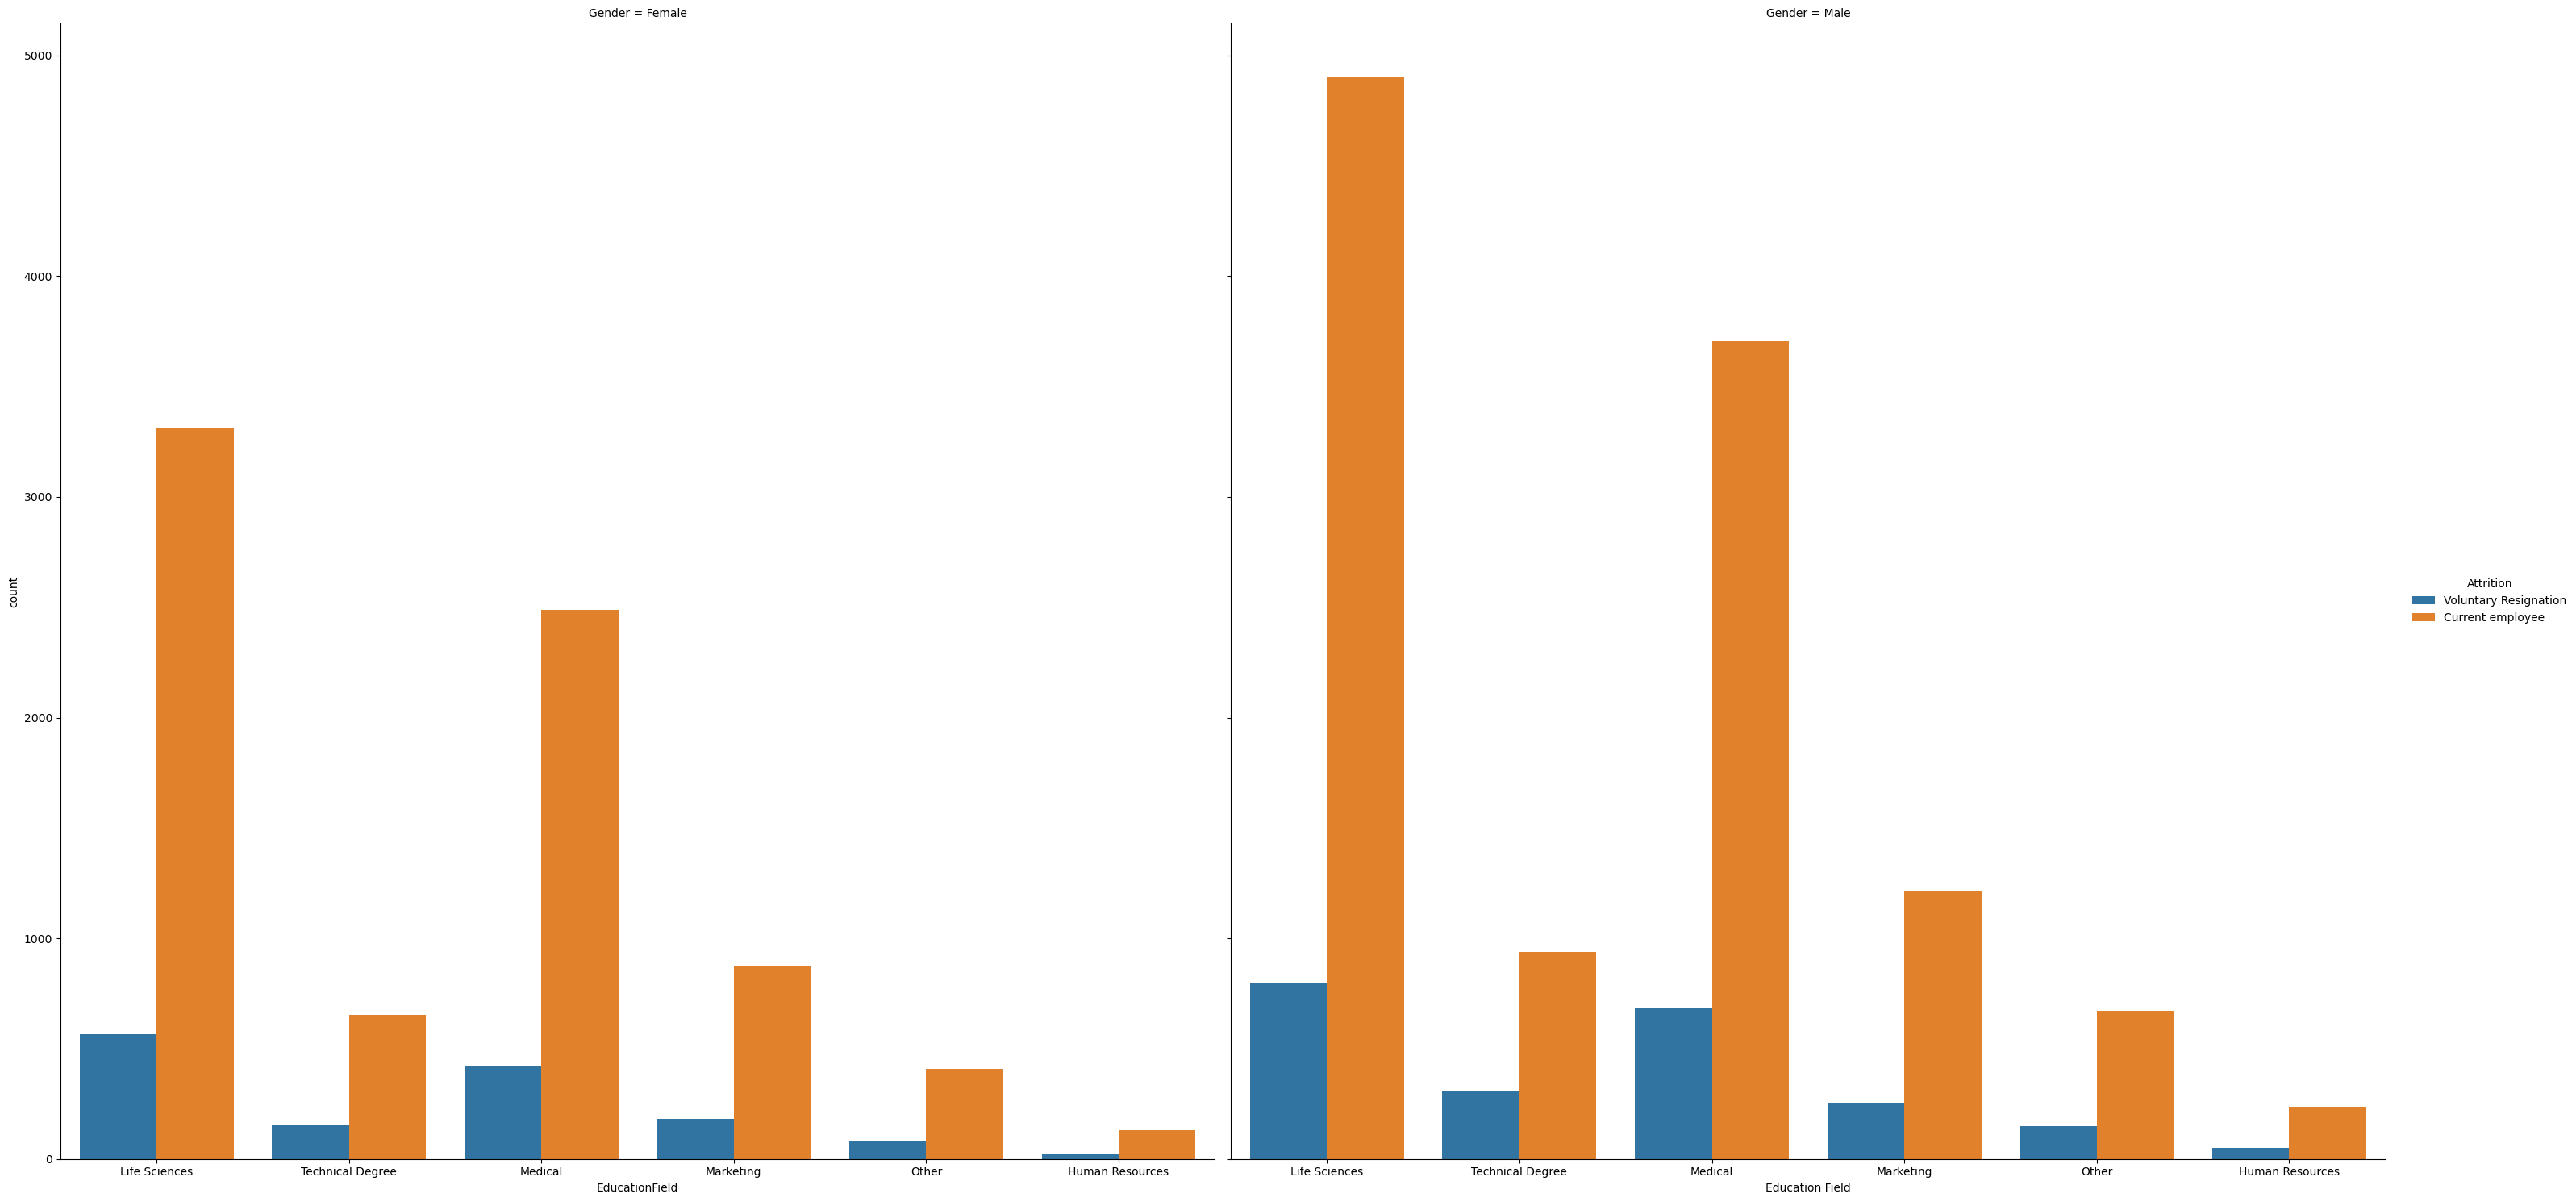

In [58]:
## Education field vs Attrition by Gender
sns.catplot(x='EducationField',hue='Attrition',col = 'Gender', data=df,kind='count', height = 15)
plt.xlabel("Education Field")
plt.ylabel('Count')
plt.show()

Gender wise education field of employees have same impact as total

It can be seen that employees with medium and low environment satisfaction have high attrition rate

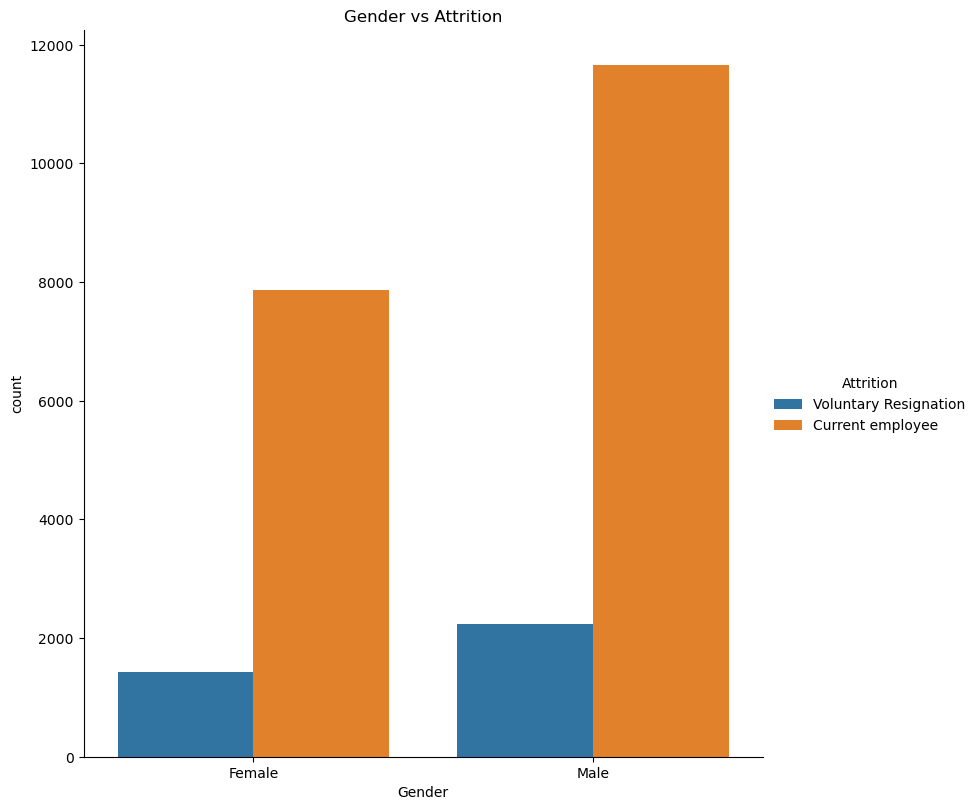

In [59]:
## Gender vs Attrition
sns.catplot(x='Gender',hue='Attrition',kind='count',data=df,height=8)
plt.title("Gender vs Attrition")
plt.show()

Number of female employees is less in the company but the attrition rate is slightly more when compared to male employees

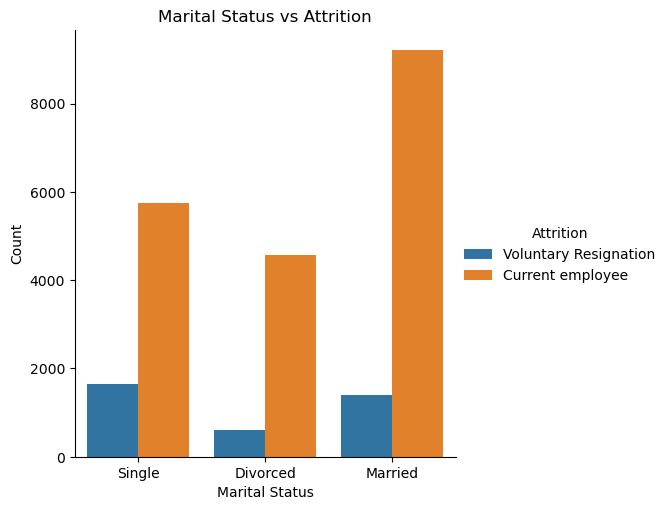

In [60]:
## Marital Status vs Attrition
sns.catplot(x='MaritalStatus',hue='Attrition',kind='count',data=df)
plt.title("Marital Status vs Attrition")
plt.xlabel("Marital Status")
plt.ylabel('Count')
plt.show()

Most of the employees in the company are married but there is high attrition in case of single employees

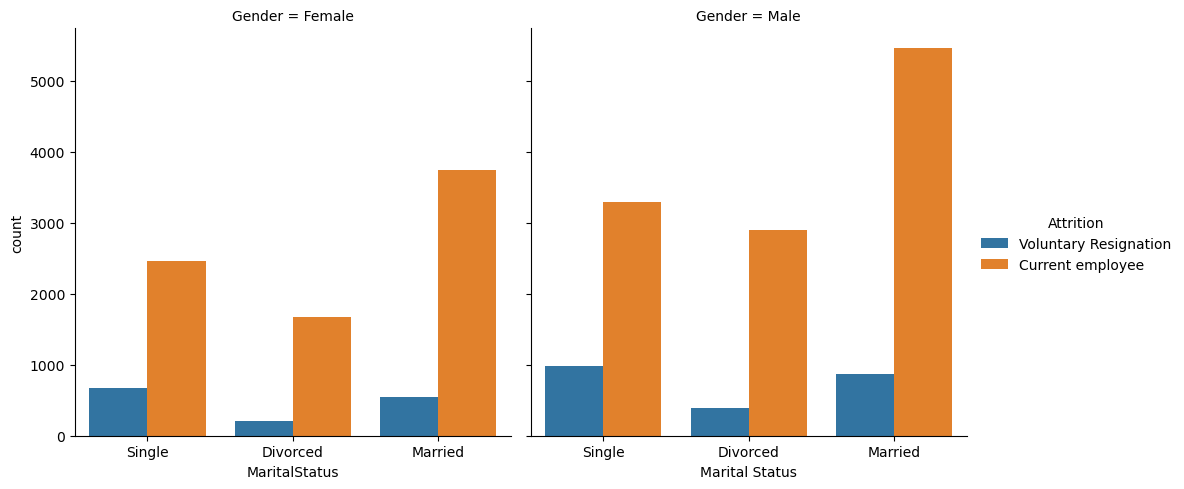

In [61]:
## Marital Status vs Attrition by Gender
sns.catplot(x='MaritalStatus',hue='Attrition',col = 'Gender',kind='count',data=df)
plt.xlabel("Marital Status")
plt.ylabel('Count')
plt.show()

Attrition in single female employees is more compared to male employees

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

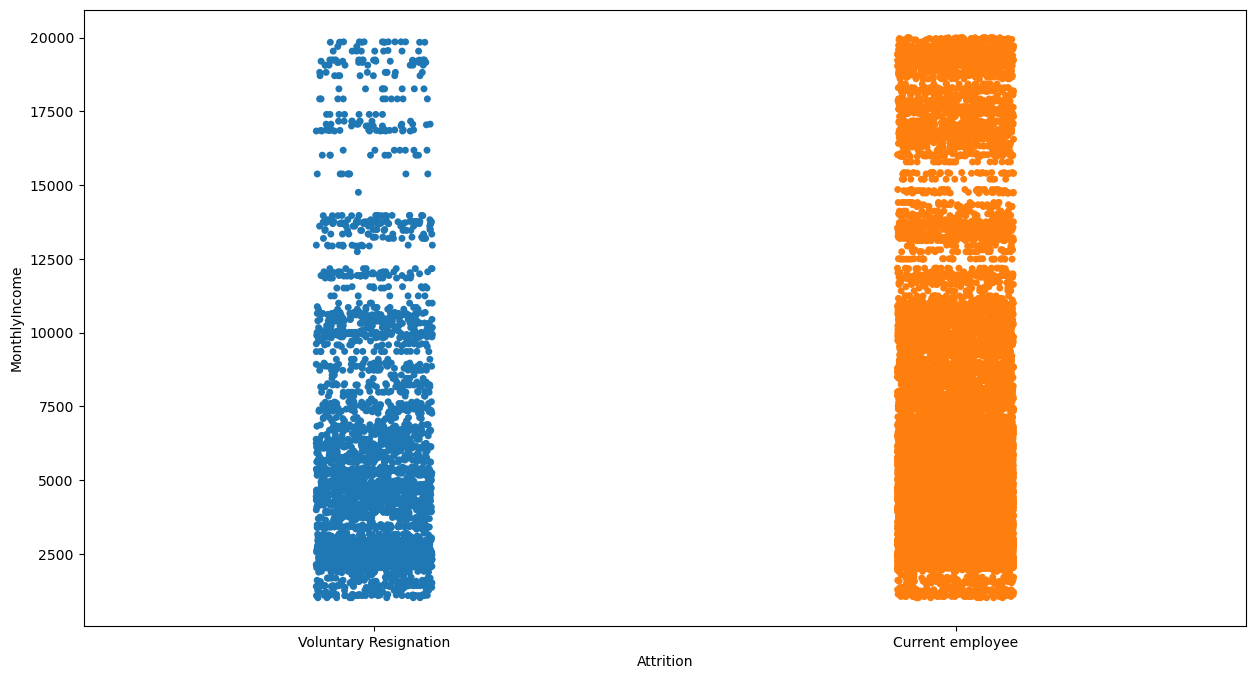

In [62]:
sns.stripplot(x="Attrition", y="MonthlyIncome", data=df, jitter=True)

We can observe that the attrition rate is more incase of employees who have less than 15000 monthly income and more than 50% resigned employees have monthly income less than 10,000

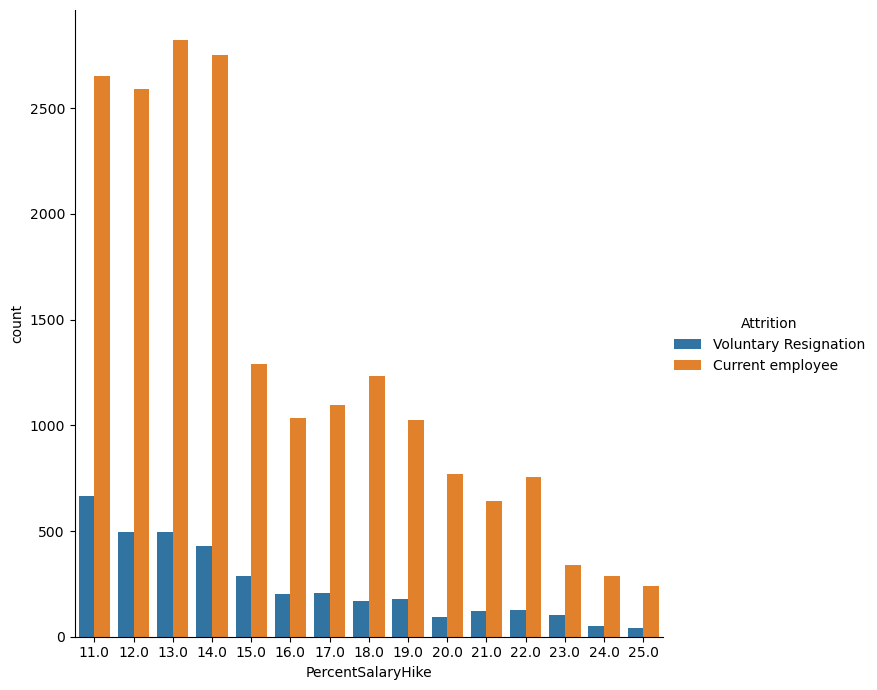

In [63]:
sns.catplot(x='PercentSalaryHike',hue='Attrition',kind='count',data=df, height = 7)

PercentSalaryHike of employees seem to match throughout

In [65]:
df_corr = df.corr()

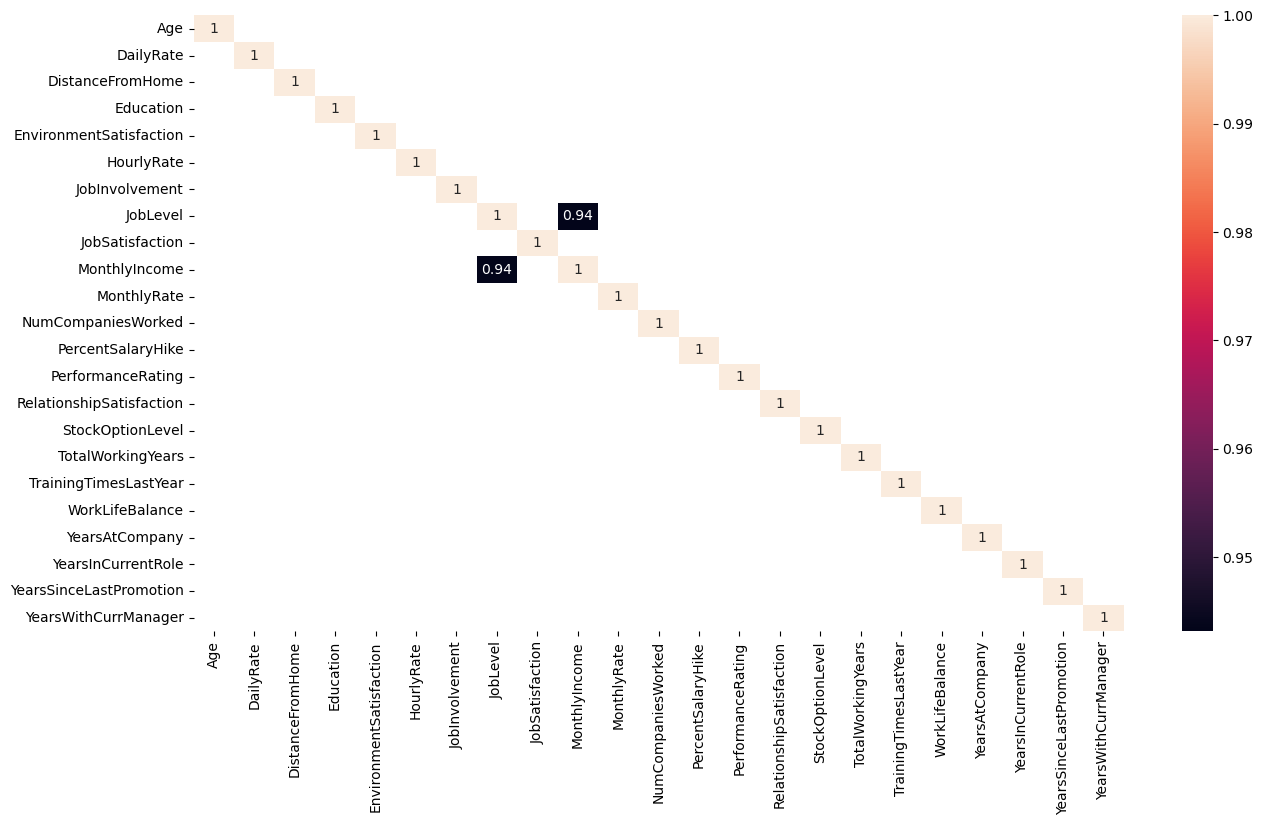

In [66]:
sns.heatmap(df_corr[(df_corr>0.85) | (df_corr<-0.85)],annot=True)
plt.show()

Monthly income and job invovlement seems to be highly correlated but as they are the only impacting attributes lets ignore

In [68]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

# Scaling the data

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
numcols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [71]:
sc = StandardScaler()

In [72]:
df[numcols] = sc.fit_transform(df[numcols])

# Converting categorical columns to numerical

In [73]:
cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Employee Source']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [74]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,0.447199,1,2,0.743547,2,-1.011153,-0.886627,1,-0.657621,0,1.384006,0.379583,-0.05911,7,1.155183,2,-0.109486,0.729234,2.126010,1,-1.151532,-0.42867,-1.585622,-0.933917,-0.42105,-2.170018,-2.498061,-0.165708,-0.063621,-0.678535,0.243394,7
1,0.447199,1,2,0.743547,2,-1.011153,-0.886627,1,-0.657621,0,1.384006,0.379583,-0.05911,7,1.155183,2,-0.109486,0.729234,0.524844,1,-1.151532,-0.42867,-1.585622,-0.933917,-0.42105,-2.170018,-2.498061,-0.165708,-0.063621,-0.678535,0.243394,7
2,0.447199,1,2,0.743547,2,-1.011153,-0.886627,1,-0.657621,0,1.384006,0.379583,-0.05911,7,1.155183,2,-0.109486,0.729234,2.126010,1,-1.151532,-0.42867,-1.585622,-0.933917,-0.42105,-2.170018,-2.498061,-0.165708,-0.063621,-0.678535,0.243394,7
3,0.447199,1,2,0.743547,2,-1.011153,-0.886627,1,-0.657621,0,1.384006,0.379583,-0.05911,7,1.155183,2,-0.109486,0.729234,0.524844,1,-1.151532,-0.42867,-1.585622,-0.933917,-0.42105,-2.170018,-2.498061,-0.165708,-0.063621,-0.678535,0.243394,7
4,0.447199,1,2,0.743547,2,-1.011153,-0.886627,1,-0.657621,0,1.384006,0.379583,-0.05911,7,1.155183,2,-0.109486,0.729234,2.126010,1,-1.151532,-0.42867,-1.585622,-0.933917,-0.42105,-2.170018,-2.498061,-0.165708,-0.063621,-0.678535,0.243394,7


# Building basic model

In [95]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 42)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18552, 31), (4639, 31), (18552,), (4639,))

Naive Bayes

In [120]:
from  sklearn.naive_bayes import GaussianNB

In [125]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [127]:
## Train accuray
y_pred = nb.predict(X_train)
y_accuracy = accuracy_score(y_train, y_pred)*100
y_accuracy

82.95062526951273

In [128]:
## Test Accuracy
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)*100
nb_accuracy

83.09980599267084

In [129]:
confusion_matrix(y_test,nb_pred)

array([[3627,  288],
       [ 496,  228]], dtype=int64)

In [130]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3915
           1       0.44      0.31      0.37       724

    accuracy                           0.83      4639
   macro avg       0.66      0.62      0.64      4639
weighted avg       0.81      0.83      0.82      4639



confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A0811590D0>


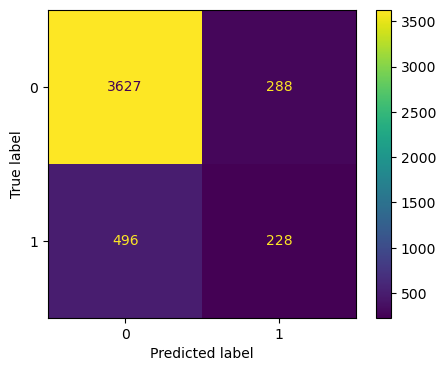

In [131]:
plt.rcParams['figure.figsize'] = [5,4]
print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test,nb_pred)).plot())

Using naive bayes classifier we can observe train accuracy is 82.95 and test accuracy is 83.09. The model has predicted 3627 true positives and 228 true negatives.

Let's check if the model performance improves if we balance the data using SMOTE



In [132]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [134]:
# transform the dataset oversample = SMOTE() 
X1, y1 = SMOTE().fit_resample(X, y) 

In [135]:
# summarize the new class distribution 
counter = Counter(y1) 
print(counter)

Counter({1: 19529, 0: 19529})


In [137]:
X1.shape, y1.shape

((39058, 31), (39058,))

In [138]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = .20, random_state = 42)

In [139]:
nb1 = GaussianNB()
nb1.fit(X1_train, y1_train)

GaussianNB()

In [140]:
y1_pred = nb1.predict(X1_train)
y1_accuracy = accuracy_score(y1_train, y1_pred)*100
y1_accuracy

61.969532100108815

In [141]:
nb1_pred = nb1.predict(X1_test)
nb1_accuracy = accuracy_score(y1_test, nb1_pred)*100
nb1_accuracy

62.28878648233487

We can observe balancing data is just decreasing model accuracy so let's go with unbalanced data. So, let's check for important features which might improve model accuracy

# Feature Selection

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [143]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_tr_pred = rf_model.predict(X_train)
rf_pred = rf_model.predict(X_test)

In [144]:
print('RF model R2_score:',r2_score(y_train,rf_tr_pred))
print('RF model rmse:', np.sqrt(mean_squared_error(y_test,rf_pred)))

RF model R2_score: 0.9974820053009626
RF model rmse: 0.04261196149876405


In [145]:
rf_model.feature_importances_

array([0.11189826, 0.02125335, 0.13328764, 0.0214032 , 0.07411417,
       0.02500456, 0.00721102, 0.02062084, 0.00669885, 0.06161448,
       0.02170314, 0.00802902, 0.03446567, 0.019339  , 0.01862271,
       0.06488605, 0.05074694, 0.00632375, 0.02011644, 0.03486167,
       0.00045227, 0.01842816, 0.01708593, 0.03814257, 0.02809955,
       0.01729275, 0.02638608, 0.0197029 , 0.02236889, 0.02340151,
       0.02643862])

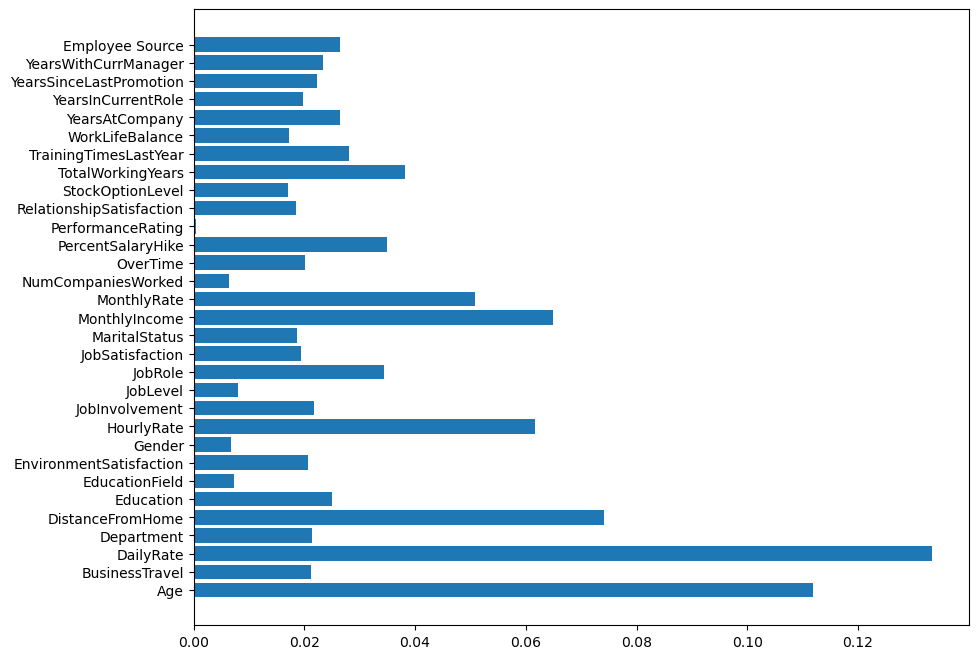

In [146]:
plt.figure(figsize = (10,8))
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

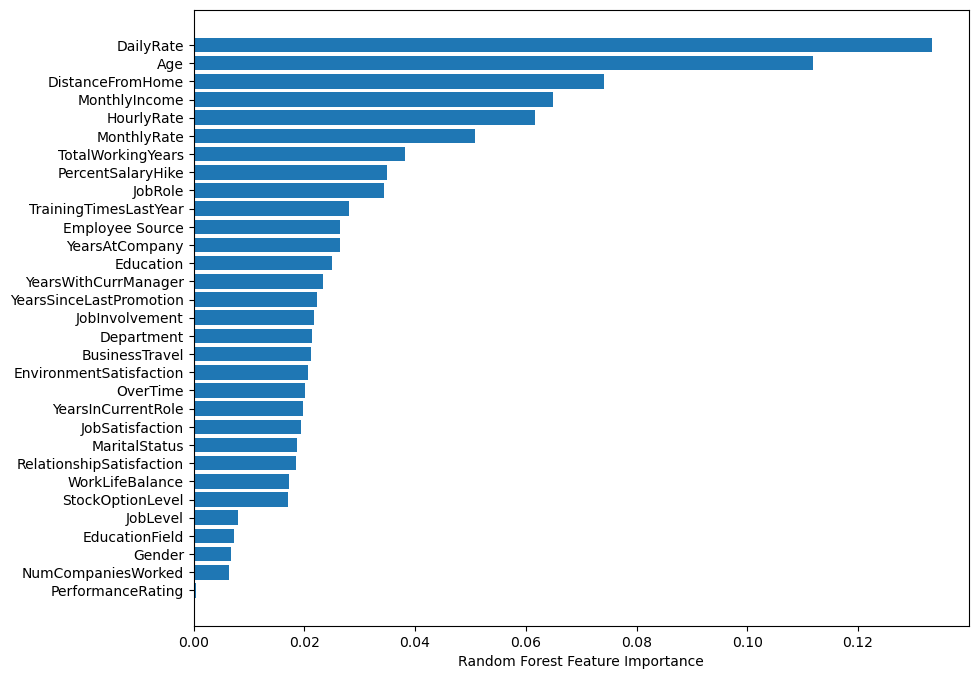

In [147]:
plt.figure(figsize = (10,8))
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [148]:
df_fea_imp = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns = ['cols','imp'])

In [149]:
df_fea_imp.sort_values('imp', ascending = False)

,cols,imp
2,DailyRate,0.133288
0,Age,0.111898
4,DistanceFromHome,0.074114
15,MonthlyIncome,0.064886
9,HourlyRate,0.061614
16,MonthlyRate,0.050747
23,TotalWorkingYears,0.038143
19,PercentSalaryHike,0.034862
12,JobRole,0.034466
24,TrainingTimesLastYear,0.028100


Selecting attributes with importance more than 0.03
9 Important features based on randomforest regressor selected are DailyRate, Age, DistanceFromHome, MonthlyIncome, HourlyRate, MonthlyRate, TotalWorkingYears, JobRole, PercentSalaryHike

In [150]:
X_imp = df[['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'HourlyRate', 'MonthlyRate', 
            'TotalWorkingYears', 'JobRole', 'PercentSalaryHike']]

In [151]:
X_imp_train, X_imp_test, y_i_train, y_i_test = train_test_split(X_imp, y, test_size = .20, random_state = 42)

In [152]:
X_imp_train.shape, X_imp_test.shape, y_i_train.shape, y_i_test.shape

((18552, 9), (4639, 9), (18552,), (4639,))

In [153]:
nb_i = GaussianNB()
nb_i.fit(X_imp_train, y_i_train)

GaussianNB()

In [154]:
nb_i = GaussianNB()
nb_i.fit(X_imp_train, y_i_train)

GaussianNB()

In [155]:
## Train accuray
y_i_pred = nb_i.predict(X_imp_train)
y_i_accuracy = accuracy_score(y_i_train, y_i_pred)*100
y_i_accuracy

84.07718844329453

In [156]:
## Test Accuracy
nb_i_pred = nb_i.predict(X_imp_test)
nb_i_accuracy = accuracy_score(y_i_test, nb_i_pred)*100
nb_i_accuracy

84.30696270748005

Model seems to improve slightly with important features.

# Logistic Regression using scaled data with important features

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
lr = LogisticRegression()
lr.fit(X_imp_train, y_i_train)
lr_pred = lr.predict(X_imp_test)
lr_accuracy = accuracy_score(y_i_test, lr_pred)*100
lr_accuracy

84.39318818710929

In [159]:
confusion_matrix(y_i_test, lr_pred)

array([[3915,    0],
       [ 724,    0]], dtype=int64)

In [160]:
print(classification_report(y_i_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3915
           1       0.00      0.00      0.00       724

    accuracy                           0.84      4639
   macro avg       0.42      0.50      0.46      4639
weighted avg       0.71      0.84      0.77      4639



Logistic regression is not suiting this model as it is failing to identify False positives and true negatives

# Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree with all the attributes

In [162]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

In [163]:
## Train accuray
dt1_train_pred = dt1.predict(X_train)
dt1_train_accuracy = accuracy_score(y_train, dt1_train_pred)*100
dt1_train_accuracy


100.0

In [165]:
## Test Accuracy
dt1_pred = dt1.predict(X_test)
dt1_accuracy = accuracy_score(y_test, dt1_pred)*100
dt1_accuracy

99.63354171157577

In [166]:
print(classification_report(y_test, dt1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       0.99      0.99      0.99       724

    accuracy                           1.00      4639
   macro avg       0.99      0.99      0.99      4639
weighted avg       1.00      1.00      1.00      4639



confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A0810A4E80>


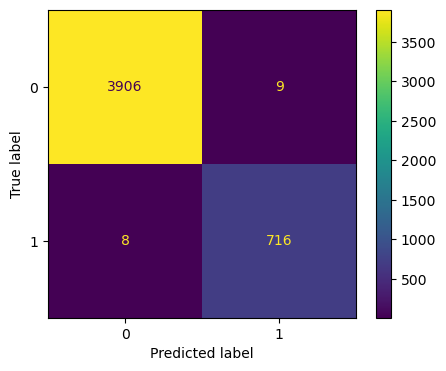

In [167]:
plt.rcParams['figure.figsize'] = [5,4]
print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test, dt1_pred)).plot())

We can observe that decision tree model with all the attributes with accuracy 99.65 has predicted 716 employees are going to resign voluntarily

Decision tree model with important features

In [168]:
dt = DecisionTreeClassifier()
dt.fit(X_imp_train, y_i_train)
dt_pred = dt.predict(X_imp_test)

In [170]:
dt_train_pred = dt.predict(X_imp_train)
dt_train_accuracy = accuracy_score(y_i_train, dt_train_pred)*100
dt_train_accuracy

100.0

In [172]:
dt_test_accuracy = accuracy_score(y_i_test, dt_pred)*100
dt_test_accuracy

99.63354171157577

In [173]:
confusion_matrix(y_i_test, dt_pred)

array([[3903,   12],
       [   5,  719]], dtype=int64)

In [174]:
confusion_matrix(y_i_test, dt_pred)

array([[3903,   12],
       [   5,  719]], dtype=int64)

In [175]:
print(classification_report(y_i_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       0.98      0.99      0.99       724

    accuracy                           1.00      4639
   macro avg       0.99      1.00      0.99      4639
weighted avg       1.00      1.00      1.00      4639



In [176]:
print(classification_report(y_i_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       0.98      0.99      0.99       724

    accuracy                           1.00      4639
   macro avg       0.99      1.00      0.99      4639
weighted avg       1.00      1.00      1.00      4639



confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A084C96CD0>


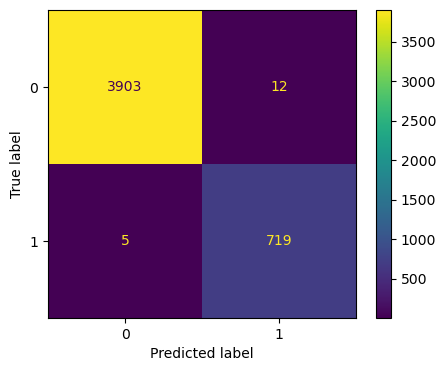

In [177]:
plt.rcParams['figure.figsize'] = [5,4]
print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_i_test, dt_pred)).plot())

With important features decision tree model has accuracy with 99.61% accuracy predicts 719 employees attrition

Lets try random forest model to check if the model can get improved little more

# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
## Building model with all the features
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
## Train accuray
rf1_train_pred = rf1.predict(X_train)
rf1_train_accuracy = accuracy_score(y_train, rf1_train_pred)*100
rf1_train_accuracy

100.0

In [181]:
## Test Accuracy
rf1_pred = rf1.predict(X_test)
rf1_accuracy = accuracy_score(y_test, rf1_pred)*100
rf1_accuracy

99.80599267083423

In [183]:
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      0.99      0.99       724

    accuracy                           1.00      4639
   macro avg       1.00      0.99      1.00      4639
weighted avg       1.00      1.00      1.00      4639



confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A08223FD90>


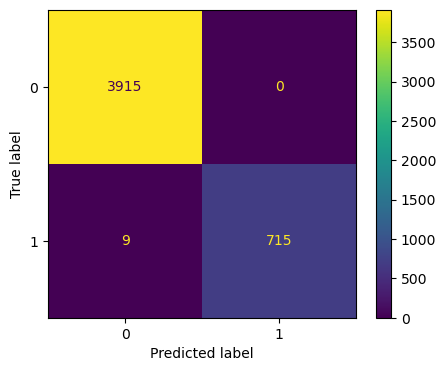

In [184]:
plt.rcParams['figure.figsize'] = [5,4]
print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test, rf1_pred)).plot())

Random Forest model with all features gives better accuracy with 99.78 predicting 714 employees leaving voluntarily

In [185]:
rfc = RandomForestClassifier()
rfc.fit(X_imp_train, y_i_train)
rfc_pred = rfc.predict(X_imp_test)

In [186]:
rfc_train_pred = rfc.predict(X_imp_train)
rfc_train_accuracy = accuracy_score(y_i_train, rfc_train_pred)*100
rfc_train_accuracy

100.0

In [187]:
rfc_test_accuracy = accuracy_score(y_i_test, rfc_pred)*100
rfc_test_accuracy

99.80599267083423

In [190]:
confusion_matrix(y_i_test, rfc_pred)

array([[3914,    1],
       [   8,  716]], dtype=int64)

In [191]:
print(classification_report(y_i_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3915
           1       1.00      0.99      0.99       724

    accuracy                           1.00      4639
   macro avg       1.00      0.99      1.00      4639
weighted avg       1.00      1.00      1.00      4639



confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A08280ECD0>


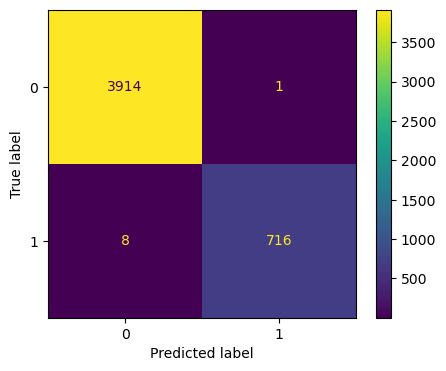

In [192]:
plt.rcParams['figure.figsize'] = [5,4]
print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_i_test, rfc_pred)).plot())

Random forest with important features is giving best accuracy which is 99.80.

# KNN Model

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [195]:
k_values = range(3, 21)
list(k_values)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [196]:
test_accuracy={}

In [197]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_imp_train, y_i_train)
  knn_pred = knn.predict(X_imp_test)
  test_accuracy[k] = accuracy_score(y_i_test, knn_pred)

In [198]:
test_accuracy

{3: 0.9926708342315154,
 4: 0.9859883595602501,
 5: 0.9849105410648846,
 6: 0.9762879931019617,
 7: 0.9702522095279155,
 8: 0.9588273334770425,
 9: 0.9433067471437809,
 10: 0.9107566285837465,
 11: 0.895020478551412,
 12: 0.8691528346626428,
 13: 0.8568657038154774,
 14: 0.858159086009916,
 15: 0.8562190127182583,
 16: 0.8721707264496659,
 17: 0.8728174175468851,
 18: 0.8697995257598621,
 19: 0.8691528346626428,
 20: 0.8687217072644967}

With 3 nearest neighbours we can observe the model is giving 99.27% accuracy

# Inference
Random Forest with important features which is giving 99.80% have best accuracy.
Daily Rate, Hourly Rate, Monthly Rate, Hourly Rate and Monthly income seem to be related but as the employee type is not given we have to consider it as important feature as shown by feature selection technique
Tree Based models are fitting the data better from the above analysis.